In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
from matplotlib.ticker import MultipleLocator


import plotly.graph_objects as go
import plotly.express as px

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# missing value treatment
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# column transformer
from sklearn.compose import ColumnTransformer

# pipeline (menggabungkan beberapa tahapan jadi 1)
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# model machine learning
import statsmodels.api as sm # model interpretation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import lightgbm as lgb

# evaluation
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# normaltest
from scipy.stats import normaltest

# Residual Plot
from yellowbrick.regressor import ResidualsPlot

# model interpretation
import shap

# save model
import joblib

import warnings
# Nonaktifkan semua warning
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Pra Kata

Premier League 2024/2025 memang sudah selesai. Liverpool keluar sebagai juara, disusul oleh Arsenal dan Manchester City. Di sisi lain, Leicester City, Ipswich Town dan Southampton menjadi tiga tim yang terdegradasi di akhir musim.

Fokus pada kiprah Southampton, tim ini sebenarnya mempunyai beberapa pemain potensial yang dirasa oleh beberapa pengamat cukup baik. Mulai dari mendatangkan kiper Aaron Ramsdale dari Arsenal pada Agustus 2024, lalu ada Taylor Harwood-Bellis yang didatangkand dari Manchester City, juga Adam Lallana yang memperkuat Southampton setelah kontraknya habis dari Brighton & Hove Albion. Ada juga nama Mateus Fernandes yang mereka datangkan dari Sporting Lisbon pada tanggal 20 Agustus 2024. Untuk Mateus Fernandes, ia ternyata mendapatkan penghargaan dari fans Southampton di akhir musim meski tim berjuluk The Saints ini harus terdegradasi.

Lalu apa yang membuat tim ini terpuruk selama pergelaran Premier League 2024/2025? Untuk menjawab itu, saya berusaha untuk mencarinya pada paparan data dan statistik terkait Premier League dan para pemainnya.

Ada 2 buah data yang digunakan pada analisa ini, yaitu:
1. Data dari kaggle: [Football Matches 2024/25 — Dataset](https://www.kaggle.com/datasets/tarekmasryo/football-matches-20242025-top-5-leagues) Berisi data dari 6 Liga top Eropa yang nantinya akan bisa dipisahkan menjadi data Premier League Untuk melihat kiprah Southampton
2. Data hasil scrapping website: [Fbref.com](https://fbref.com/en/comps/9/2024-2025/2024-2025-Premier-League-Stats) difokuskan untuk statistik pemain di Premier League musim 2024/2025.

# Pemahaman Data

In [58]:
df_raw =pd.read_csv(r"H:\Data Science\Personal\Football Match 2024-2025\football_matches_2024_2025.csv")
df_raw.head()

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,home_team,away_team_id,away_team,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,referee_id
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,Manchester United FC,63,Fulham FC,1,0,0,0,1,1,Home Win,3,0,1
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,Ipswich Town FC,64,Liverpool FC,0,2,0,0,-2,2,Away Win,0,3,2
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,Arsenal FC,76,Wolverhampton Wanderers FC,2,0,1,0,2,2,Home Win,3,0,3
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,Everton FC,397,Brighton & Hove Albion FC,0,3,0,1,-3,3,Away Win,0,3,4
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,Newcastle United FC,340,Southampton FC,1,0,1,0,1,1,Home Win,3,0,5


## Penjelasan Kolom-Kolom Data

| **Nama Kolom**  | **Deskripsi**  |
|-------------|------------------|
|1. **`competition_code`**    | ID Kompetisi <br> - `PL`: Premiere League <br> - `PD`: La Liga <br> - `SA`: Serie A <br> - `BL1`: Bundesliga <br> - `FL1`: Ligue 1 <br> - `CL`: UEFA Champions League	  |
| 2. **`competition_name`**    | Nama Kompetisi |
| 3. **`season`**    | Musim Kompetisi |
| 4. **`match_id`**    | ID Pertandingan |
| 5. **`matchday`**    | Pekan pertandingan ke-berapa |
| 6. **`stage`**  | Tahapan Kompetisi |
| 7. **`status`**   | Status Pertandingan |
| 8. **`date_utc`** | Waktu (Tanggal dan Jam) Pertandingan (UTC) |
| 9. **`referee`** | Nama Wasit |
| 10. **`home_team_id`** | ID Tim Kandang |
| 11. **`home_team`**  | Nama Tim Kandang |
| 12. **`away_team_id`**  | ID Tim Tandang |
| 13. **`away_team`**    | Nama Tim Tandang |
| 14. **`fulltime_home`**     | Hasil Akhir Pertandingan Untuk Tim Kandang |
| 15. **`fulltime_away`**| Hasil Akhir Pertandingan Untuk Tim Tandang |
| 16. **`halftime_home`** | Hasil Babak Pertama Untuk Tim Kandang |
| 17. **`halftime_away`**| Hasil Babak Pertama Untuk Tim Tandang |
| 18. **`goal_difference`** | Selisih Gol <br> - Positif: Jika Tim Kandang Menang <br> - Negatif: Jika Tim Tandang Menang <br> |
| 19. **`total_goals`**    | Jumlah Gol Yang Tercipta Pada Pertandingan |
| 20. **`match_outcome`**    | Hasil Pertandingan Siapa Yang Menang |
| 21. **`home_points`**  | Poin Yang Didapatkan Tim Kandang Seusai Pertandingan |
| 22. **`away_points`** | Poin Yang Didapatkan Tim Kandang Seusai Pertandingan |
| 23. **`referee_id`** | ID wasit |


# Cek Data dan Membersihkan

In [59]:
df_clean = df_raw.copy()

## Penghapusan Kolom
### 1. Kolom Season

In [60]:
print(df_clean["season"].unique())
print(df_clean["season"].nunique())

['2024/2025']
1


Dikarenakan ini adalah data pertandingan untuk 1 musim saja, musim 2024/2025 (dan sudah terbukti pada kolom `season` hanya ada 1 nilai unik) maka kolom ini bisa dihapus karena tidak mempunyai informasi lain.

In [61]:
df_clean.drop("season", axis=1, inplace=True)

### 1. Kolom Status

In [62]:
print(df_clean["status"].value_counts())

status
FINISHED    1939
AWARDED        2
Name: count, dtype: int64


Dari 1941 data pertandingan 2024/2025, status pertandingan hanya ada 2 yaitu `FINISHED` dan `AWARDED`. Isi dari nilainya juga sangat janggal, `AWARDED` hanya berisi 2 data pertandinga. Tidak dijelaskan juga perbedaan keduanya. Jadi bisa dibilang kedua informasi ini dianggap sama. Dengan begitu, kolom `status` juga bisa dihilangkan.

In [63]:
df_clean.drop("status", axis=1, inplace=True)

## Cek Data Duplikat

In [64]:
df_clean.duplicated().sum()

0

Tidak ditemukan data duplikat pada dataset ini.

## Cek Nilai *Missing Value*

In [65]:
df_clean.isna().sum()

competition_code    0
competition_name    0
match_id            0
matchday            0
stage               0
date_utc            0
referee             0
home_team_id        0
home_team           0
away_team_id        0
away_team           0
fulltime_home       0
fulltime_away       0
halftime_home       0
halftime_away       0
goal_difference     0
total_goals         0
match_outcome       0
home_points         0
away_points         0
referee_id          0
dtype: int64

Tidak ditemukan nilai kosong pada tiap baris data. Ini berarti semua data yang tersedia sudah dianggap bersih.

## Cek Tipe Data

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   competition_code  1941 non-null   object
 1   competition_name  1941 non-null   object
 2   match_id          1941 non-null   int64 
 3   matchday          1941 non-null   int64 
 4   stage             1941 non-null   object
 5   date_utc          1941 non-null   object
 6   referee           1941 non-null   object
 7   home_team_id      1941 non-null   int64 
 8   home_team         1941 non-null   object
 9   away_team_id      1941 non-null   int64 
 10  away_team         1941 non-null   object
 11  fulltime_home     1941 non-null   int64 
 12  fulltime_away     1941 non-null   int64 
 13  halftime_home     1941 non-null   int64 
 14  halftime_away     1941 non-null   int64 
 15  goal_difference   1941 non-null   int64 
 16  total_goals       1941 non-null   int64 
 17  match_outcome 

Tipe data `date_utc` masih berbentuk objek, maka dari itu ini bisa diubah menjadi tipe data `datetime64`.

In [67]:
df_clean["date_utc"] = pd.to_datetime(df_clean["date_utc"], errors="coerce", utc=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   competition_code  1941 non-null   object             
 1   competition_name  1941 non-null   object             
 2   match_id          1941 non-null   int64              
 3   matchday          1941 non-null   int64              
 4   stage             1941 non-null   object             
 5   date_utc          1941 non-null   datetime64[ns, UTC]
 6   referee           1941 non-null   object             
 7   home_team_id      1941 non-null   int64              
 8   home_team         1941 non-null   object             
 9   away_team_id      1941 non-null   int64              
 10  away_team         1941 non-null   object             
 11  fulltime_home     1941 non-null   int64              
 12  fulltime_away     1941 non-null   int64              
 13  hal

# Eksplorasi Data Analisis
Pada bagian ini, analisa data difokuskan untuk mencari trend pertandingan dari tiap kompetisi. Lalu setelah mendapatkan informasi dari tiap kompetisi, berikutnya adalah melihat performa tim di segala kompetisi. Adakah pola yang menarik dari tiap pertandingannya.

## Membagi Data Berdasarkan Kompetisi
Sebelum melakukan analisa, data yang ada harus dibagi berdasarkan tiap kompetisi

In [109]:
df_clean["competition_code"].unique()

array(['PL', 'PD', 'SA', 'BL1', 'FL1', 'CL'], dtype=object)

In [110]:
df_pl = df_clean[df_clean["competition_code"] == "PL"] #Premier League
df_laliga = df_clean[df_clean["competition_code"] == "PD"] #La Liga
Df_serieA = df_clean[df_clean["competition_code"] == "SA"] #Serie A
df_bundesliga = df_clean[df_clean["competition_code"] == "BL1"] #Bundesliga
df_ligue1 = df_clean[df_clean["competition_code"] == "FL1"] #Ligue1
df_UCL = df_clean[df_clean["competition_code"] == "CL"] #UEFA Champions League

## Premier League
Premier League adalah salah satu kompetisi sepak bola kasta tertinggi dari negara Inggris. Kompetisi ini diisi oleh 20 tim yang akan bermain dengan format dua kali pertemuan (total 38 kali bertanding).

### Melihat Peringkat Tiap Tim Berdasarkan Matchday

Peringkat tim di setiap matchday menarik untuk diperhatikan guna menemukan tren positif atau negatif dari tim-tim tersebut. Cara penentuannya adalah dengan sistem poin dan gol, yaitu:
1. Poin. kemenangan akan dihadiahi 3 poin untuk tim yang menang dan 0 poin untuk tim yang kalah. Seri akan mendapatkan 1 poin untuk masing-masing tim yang bertanding.
2. Jika perolehan poin sama, maka harus dilihat berdasarkan perbedaan kumulatifnya (Menggolkan +1, Kejebolan -1, tidak ada gol 0 ). Jika gol sebuah tim lebih tinggi dari tim lain yang poinnya sama, maka tim tersebut berhak menduduki peiringkat lebih atas.

Untuk menjawab itu, maka harus dibuat sebuah tabel baru yang berisi perolehan poin dan gol kumulatif dari tiap-tiap pertandingan yang mereka jalani (matchday.

In [69]:
home = df_pl[["matchday", "home_team", "fulltime_home", "fulltime_away", "home_points"]].copy()
home.columns = ["matchday", "team", "goals_for", "goals_against", "points"]

away = df_pl[["matchday", "away_team", "fulltime_away", "fulltime_home", "away_points"]].copy()
away.columns = ["matchday", "team", "goals_for", "goals_against", "points"]

team_matches = pd.concat([home, away], ignore_index=True)

# 2) hitung goal difference per match (signed)
team_matches["gd"] = team_matches["goals_for"] - team_matches["goals_against"]

# 3) pastikan semua kombinasi (team x matchday) ada — kalau tidak, reindex dan isi 0
matchdays = sorted(team_matches["matchday"].unique())
teams = sorted(team_matches["team"].unique())

idx = pd.MultiIndex.from_product([teams, matchdays], names=["team", "matchday"])
team_matches = team_matches.set_index(["team", "matchday"])
# reindex -> mengisi baris yang hilang dengan NaN
team_matches = team_matches.reindex(idx)
# isi NaN dengan 0 untuk kolom numerik (tim yang belum main pada matchday tertentu)
team_matches[["goals_for", "goals_against", "points", "gd"]] = team_matches[["goals_for", "goals_against", "points", "gd"]].fillna(0)
team_matches = team_matches.reset_index()

# 4) urutkan lalu hitung kumulatif
team_matches = team_matches.sort_values(["team", "matchday"])
team_matches["cumulative_points"] = team_matches.groupby("team")["points"].cumsum()
team_matches["cumulative_gd"] = team_matches.groupby("team")["gd"].cumsum()

#### Tabel Poin Kumulatif
Berikut adalah perolehan poin (menggunakan perhitungan kumulatif) yang didapatkan oleh 20 tim yang bertanding di Premier League. Perolehan ini berdasar pada hasil laga di tiap matchday.

In [70]:
df_kumulatif_poin= team_matches.pivot(index="matchday", columns="team", values="cumulative_points")
df_kumulatif_poin

team,AFC Bournemouth,Arsenal FC,Aston Villa FC,Brentford FC,Brighton & Hove Albion FC,Chelsea FC,Crystal Palace FC,Everton FC,Fulham FC,Ipswich Town FC,Leicester City FC,Liverpool FC,Manchester City FC,Manchester United FC,Newcastle United FC,Nottingham Forest FC,Southampton FC,Tottenham Hotspur FC,West Ham United FC,Wolverhampton Wanderers FC
matchday,,,,,,,,,,,,,,,,,,,,
1,1,3,3,3,3,0,0,0,0,0,1,3,3,3,3,1,0,1,0,0
2,2,6,3,3,6,3,0,0,3,0,1,6,6,3,4,4,0,4,3,0
3,5,7,6,6,7,4,1,0,4,1,1,9,9,3,7,5,0,4,3,1
4,5,10,9,6,8,7,2,0,5,2,2,9,12,6,10,8,0,4,4,1
5,5,11,12,6,9,10,3,1,8,3,3,12,13,7,10,9,1,7,4,1
6,8,14,13,7,9,13,3,4,11,4,3,15,14,7,11,9,1,10,5,1
7,8,17,14,10,12,14,3,5,11,4,6,18,17,8,12,10,1,10,8,1
8,11,17,17,10,15,14,3,8,11,4,9,21,20,11,12,13,1,13,8,1
9,12,18,18,13,16,17,6,9,12,4,9,22,23,11,12,16,1,13,11,2


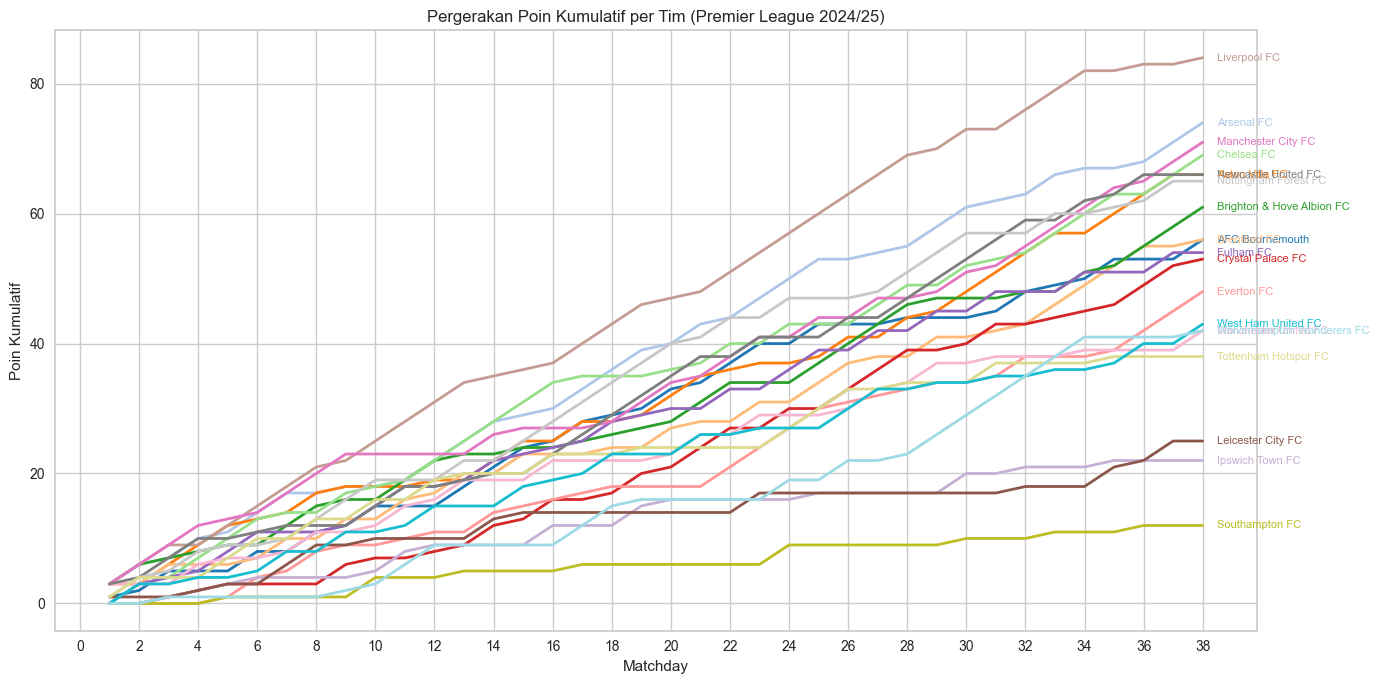

In [71]:
plt.figure(figsize=(14, 7))

colors = cm.tab20.colors  # palet kontras dengan 20 warna

for i, team in enumerate(df_kumulatif_poin.columns):
    if team != "matchday":  # skip kolom matchday kalau masih ada
        y = df_kumulatif_poin[team]
        x = df_kumulatif_poin.index
        plt.plot(x, y, label=team, linewidth=2, color=colors[i % len(colors)])
        
        # ambil titik terakhir
        plt.text(
            x.max() + 0.5,   # posisi x agak ke kanan
            y.iloc[-1],      # nilai y terakhir
            team,            # nama tim
            va="center", 
            fontsize=8, 
            color=colors[i % len(colors)]
        )

plt.xlabel("Matchday")
plt.ylabel("Poin Kumulatif")
plt.title("Pergerakan Poin Kumulatif per Tim (Premier League 2024/25)")

# grid setiap 2 matchday
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, linestyle="-", alpha=1)

plt.tight_layout()
plt.show()

Liverpool terlihat sangat mendominasi dari sisi perolehan poin. Perolehan poin Liverpool sudah tidak terkejar oleh tim lain, mulai dari matchday ke-10. Padahal, sebelumnya, Manchester City sempat lebih unggul perolehan poinnya di matchday ke-sembilan, namun, tim ini sepertinya mengalami penurunan performa di 4 laga setelahnya (matchday 10 kalah dari Bournemouth (tandang), matchday 11 kalah dari Brighton (tandang), matchday 12 kalah dari Tottenham (kandang), Matchday 13 kalah dari Liverpool (tandang)). Hasil negatif ini menjauhkan Manchester City dari *race* menuju juara karena harus dibalap oleh Arsenal (25 poin), Chelsea (25 poin) dan imbang perolehan poin dengan Brighton (23 poin) pada matchday ke-13.

Di sisi lain, Southampton harus terdegradasi karena hanya mengumpulkan 12 poin dari 38 laga (2 kali menang, 6 kali seri, dan 30 kali kalah). Perolehan poin kumulatif Southampton selalu menjadi yang terkecil mulai dari matchday 11 hingga akhir musim.

#### Tabel Gol Kumulatif
Berikut adalah perolehan gol kumulatif(menggolkan dikurangi kebobolan) yang didapatkan oleh 20 tim yang bertanding di Premier League. Perolehan ini berdasar pada hasil laga di tiap matchday.

In [72]:
df_kumulatif_gol = team_matches.pivot(index="matchday", columns="team", values="cumulative_gd")
df_kumulatif_gol

team,AFC Bournemouth,Arsenal FC,Aston Villa FC,Brentford FC,Brighton & Hove Albion FC,Chelsea FC,Crystal Palace FC,Everton FC,Fulham FC,Ipswich Town FC,Leicester City FC,Liverpool FC,Manchester City FC,Manchester United FC,Newcastle United FC,Nottingham Forest FC,Southampton FC,Tottenham Hotspur FC,West Ham United FC,Wolverhampton Wanderers FC
matchday,,,,,,,,,,,,,,,,,,,,
1,0,2,1,1,3,-2,-1,-3,-1,-2,0,2,2,1,1,0,-1,0,-1,-2
2,0,4,-1,-1,4,2,-3,-7,0,-5,-1,4,5,0,1,1,-2,4,1,-6
3,1,4,0,1,4,2,-3,-8,0,-5,-2,7,7,-3,2,1,-4,3,-1,-6
4,0,5,1,0,4,3,-3,-9,0,-5,-2,6,8,0,3,2,-7,2,-1,-7
5,-3,5,3,-2,4,6,-3,-9,2,-5,-2,9,8,0,1,2,-7,4,-4,-9
6,-1,7,3,-2,2,8,-4,-8,3,-5,-4,10,8,-3,1,1,-9,7,-4,-10
7,-2,9,3,0,3,8,-5,-8,2,-8,-3,11,9,-3,1,1,-11,6,-1,-12
8,0,7,5,-1,4,7,-6,-6,0,-10,-2,12,10,-2,0,2,-12,9,-4,-13
9,0,7,5,0,4,8,-5,-6,0,-11,-4,12,11,-3,-1,4,-13,8,-3,-13


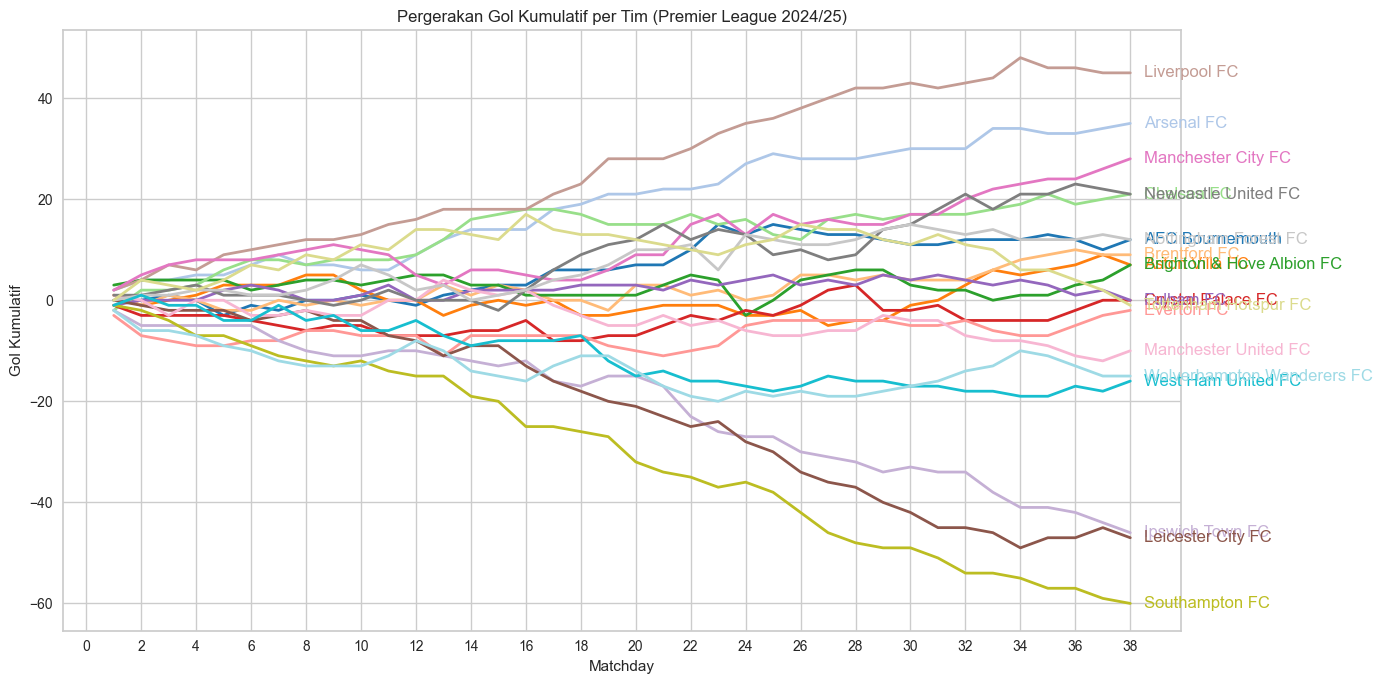

In [73]:
plt.figure(figsize=(14, 7))

colors = cm.tab20.colors  # palet kontras dengan 20 warna

for i, team in enumerate(df_kumulatif_gol.columns):
    if team != "matchday":  # skip kolom matchday kalau masih ada
        y = df_kumulatif_gol[team]
        x = df_kumulatif_gol.index
        plt.plot(x, y, label=team, linewidth=2, color=colors[i % len(colors)])
        
        # ambil titik terakhir
        plt.text(
            x.max() + 0.5,   # posisi x agak ke kanan
            y.iloc[-1],      # nilai y terakhir
            team,            # nama tim
            va="center", 
            fontsize=12, 
            color=colors[i % len(colors)]
        )

plt.xlabel("Matchday")
plt.ylabel("Gol Kumulatif")
plt.title("Pergerakan Gol Kumulatif per Tim (Premier League 2024/25)")

# grid setiap 2 matchday
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, linestyle="-", alpha=1)

plt.tight_layout()
plt.show()

Dilihat dari perolehan gol kumulatif (Gol - kebobolan) Liverpool tetap yang paling mendominasi. Meski Liverpool sempat stagnan di matchday ke-13 hingga 16 dengan 18 gol kumulatif, tapi di matchday 17 Liverpool menambah jumlah golnya menjadi 21 gol kumulatif (menang 6-3 dari Tottenham). Sementara Chelsea yang pada matchday ke-16 sempat memperoleh jumlah gol yang sama dengan Liverpool, ternyata tidak bisa memanfaatkan momentum dan malah merosot di matchday 18.

Tottenham terlihat cukup menjanjikan di matchday 16 dengan menang 5 gol tanpa balas melawan Southampton. Namun, kekalahan dari Liverpool di matchday 17 sepertinya menjadi awal tren penurunan jumlah gol kumulatif bagi tim ini, setidaknya hingga matchday 23.

Di sisi lain, Southampton terlihat sangat mengalami kesulitan menjalani tiap pertandingan di musim 2024/2025. Southampton menjadi tim terburuk dalam hal perolehan gol kumulatif (-60 gol) yang menjadikannya sebagai posisi terbawah dalam hal ini.

#### Pergerakan Posisi Klasemen
Pergerakan posisi klasemen setiap tim mulai dari matchday 1 hingga musim berakhir

In [74]:
standings_list = []
for md in matchdays:
    df_md = team_matches[team_matches["matchday"] == md].copy()
    # sort berdasarkan cumulative points > cumulative GD > (opsional) nama tim untuk determinisme
    df_md = df_md.sort_values(["cumulative_points", "cumulative_gd", "team"], ascending=[False, False, True])
    df_md["position"] = np.arange(1, len(df_md) + 1)
    df_md["matchday"] = md
    standings_list.append(df_md[["matchday", "team", "cumulative_points", "cumulative_gd", "position"]])

standings = pd.concat(standings_list, ignore_index=True)

In [75]:
standings.pivot(index="matchday", columns="team", values="position")

team,AFC Bournemouth,Arsenal FC,Aston Villa FC,Brentford FC,Brighton & Hove Albion FC,Chelsea FC,Crystal Palace FC,Everton FC,Fulham FC,Ipswich Town FC,Leicester City FC,Liverpool FC,Manchester City FC,Manchester United FC,Newcastle United FC,Nottingham Forest FC,Southampton FC,Tottenham Hotspur FC,West Ham United FC,Wolverhampton Wanderers FC
matchday,,,,,,,,,,,,,,,,,,,,
1,9,2,5,6,1,17,13,20,14,18,10,3,4,7,8,11,15,12,16,19
2,14,2,12,13,3,8,17,20,10,18,15,4,1,11,6,7,16,5,9,19
3,8,3,7,6,4,11,16,20,12,17,15,1,2,14,5,9,19,10,13,18
4,11,2,5,9,6,8,16,20,12,17,15,4,1,10,3,7,19,13,14,18
5,13,4,3,12,7,5,16,19,9,17,15,2,1,11,6,8,18,10,14,20
6,11,3,5,12,9,4,17,16,6,15,18,1,2,13,7,10,19,8,14,20
7,13,2,5,11,6,4,18,16,8,17,15,1,3,14,7,10,19,9,12,20
8,10,3,4,13,5,6,18,16,11,17,14,1,2,12,9,8,19,7,15,20
9,10,3,4,9,6,5,17,16,11,18,15,2,1,13,12,7,20,8,14,19


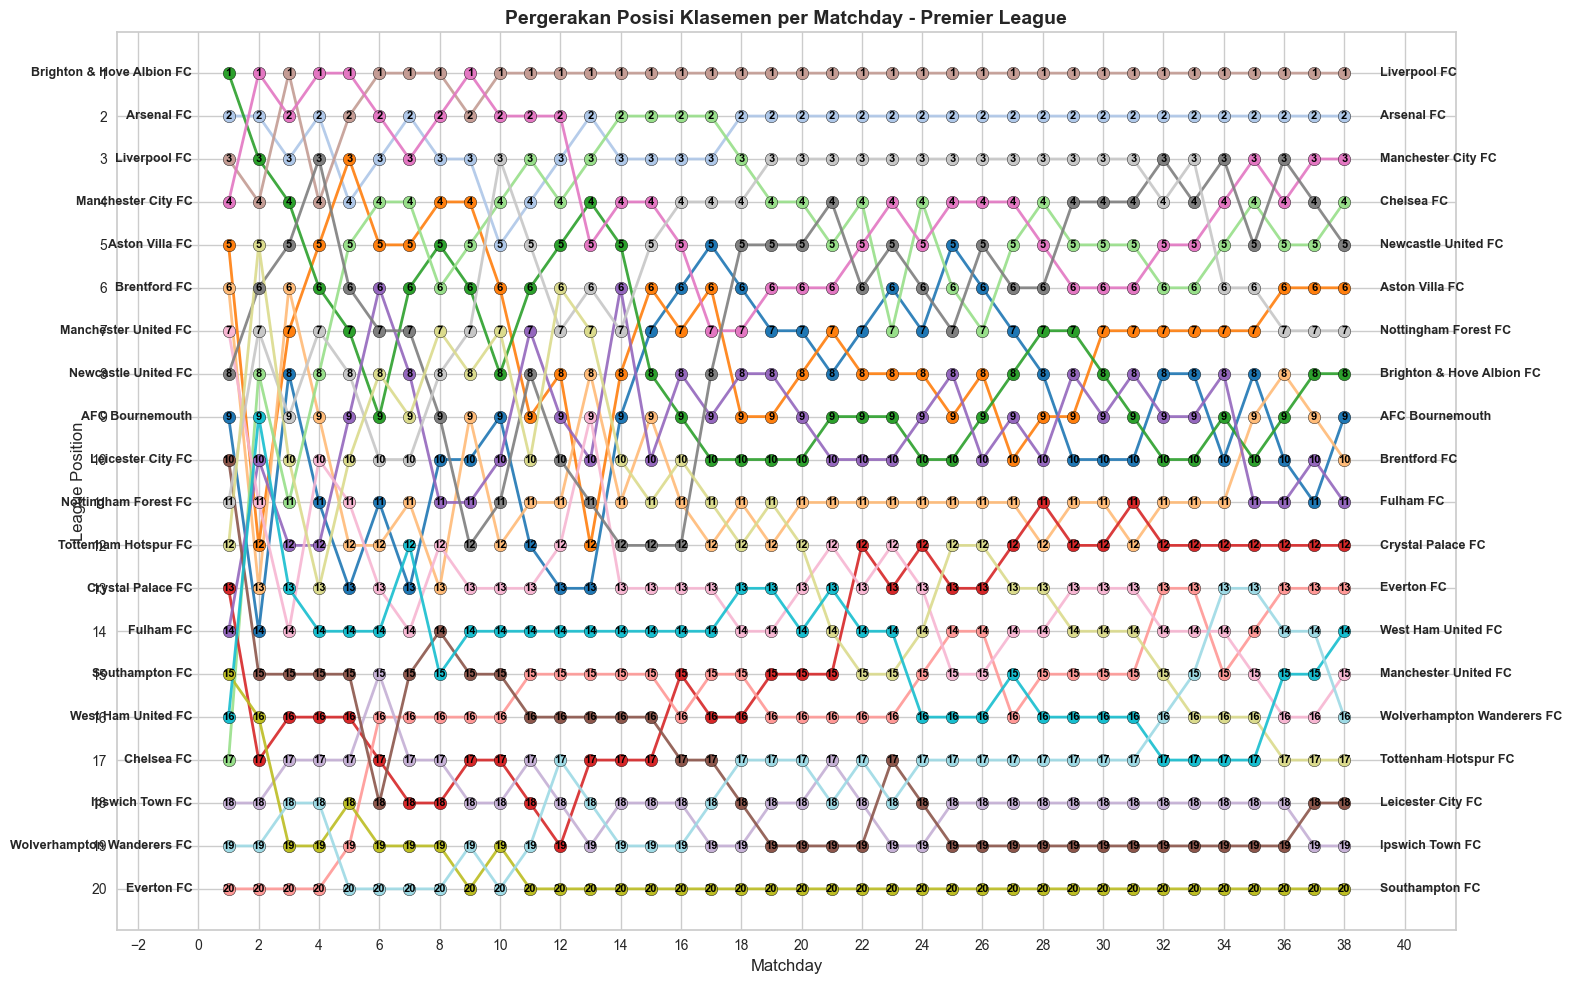

In [76]:
plt.figure(figsize=(16, 10))

teams = standings["team"].unique()
colors = cm.tab20.colors  # palet kontras dengan 20 warna

# plot garis + titik + angka
for i, (team, g) in enumerate(standings.groupby("team")):
    color = colors[i % len(colors)]
    # garis pergerakan
    plt.plot(g["matchday"], g["position"], label=team, linewidth=2, alpha=0.9, color=color)
    # titik per matchday (lebih besar, edge hitam biar jelas)
    plt.scatter(g["matchday"], g["position"], s=80, color=color, edgecolor="black", zorder=3)
    # angka posisi di tiap titik (pakai warna hitam biar kontras)
    for x, y in zip(g["matchday"], g["position"]):
        plt.text(x, y, str(y), ha="center", va="center",
                 fontsize=8, color="black", weight="bold")

# ambil posisi awal & akhir
first_matchday = standings["matchday"].min()
last_matchday = standings["matchday"].max()

first_positions = standings[standings["matchday"] == first_matchday][["team", "position"]]
last_positions = standings[standings["matchday"] == last_matchday][["team", "position"]]

# label sisi kiri (posisi awal)
for _, row in first_positions.iterrows():
    plt.text(first_matchday - 1.2, row["position"], row["team"],
             ha="right", va="center", fontsize=9, weight="bold")

# label sisi kanan (posisi akhir)
for _, row in last_positions.iterrows():
    plt.text(last_matchday + 1.2, row["position"], row["team"],
             ha="left", va="center", fontsize=9, weight="bold")

# rapikan axis
plt.gca().invert_yaxis()  # posisi 1 di atas
plt.xlabel("Matchday", fontsize=12)
plt.ylabel("League Position", fontsize=12)
plt.title("Pergerakan Posisi Klasemen per Matchday - Premier League", fontsize=14, weight="bold")

plt.xticks(range(first_matchday, last_matchday+1, 2))
plt.yticks(range(1, 21))
plt.margins(x=0.1)  # beri ruang kiri-kanan
plt.grid(alpha=0.3, linestyle="--")

plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, linestyle="-", alpha=1)

plt.tight_layout()
plt.show()


Juara Premier League musim 2024/2025, Liverpool sudah berada di puncak klasemen mulai dari matchday 10 sejalan dengan perolehan poin kumulatifnya yang juga bertahan mulai dari matchday 10. Secara total, Liverpool berada di puncak klasemen selama 33 matchday dari 38 pertandingan yang dimainkan.

Yang menarik terlihat di matchday 28 hingga matchday 38 untuk menentukan posisi di urutan 3, 4 dan 5. Sebelum matchday 28, Nottingham Forest mantap menduduki posisi tiga, bahkan dari matchday 19 hingga 31. Nottingham Forest ini dibayangi oleh tim Newcastle yang naik ke posisi 4 di matchday 29. Pada matchday 32, Newcastle berhasil menyalip perolehan poin dan memaksa Nottingham Forest untuk turun ke peringkat 4. Tapi pada matchday berikutnya (matchday 33), Nottingham Forest kembali ke posisi tiga menggeser Newcastle. Tapi ternyata perlawanan Nottingham Forest untuk berada di zona 5 besar harus terhenti lantaran pada matchday 34, Nottingham Forest merosot jauh dari posisi tiga ke posisi 6 lalu mengakhiri musim di posisi 7.

Tapi perlawanan sengit Newcastle masih belum usai. Setelah menggeser Nottingham Forest di matchday 34, ternyata tidak membuat Newcastle bisa tenang. Hal ini karena adanya incaran dari tim yang sebelumnya berada di peringkat 5 dan 6 (Manchester City dan Chelsea) yang merangsek naik seiring turunnya Nottingham Forest ke posisi 6 di matchday 34. Dan benar saja, pada matchday 35, Manchester City berhasil mencuri posisi tiga diikuti Chelsea di posisi 4 melewati Newcastle yang di matchday 35 ini berada posisi 5.

Newcastle sempat kembali naik ke posisi 3 di matchday 36, namun di dua pertandingan akhir berikutnya posisinya malah merosot sehingga harus puas selesai di posisi 5 pada akhir musim. Sedangkan Manchester City menguatkan poinnya dan naik ke posisi 3 di matchday 37. Chelsea berhasil menyalip Newcastle di pertandingan terakhir (matchday 38) sehingga layak untuk dapat posisi 4. 

### Menambahkan Data Statistik Pemain

#### Data Statistik Bertahan pemain Premier League

Data ini diambil dari https://fbref.com/en/comps/9/2024-2025/defense/2024-2025-Premier-League-Stats#all_stats_defense/ terkait dengan data para pemain di Premier League yang terlibat dalam aspek pertahanan timnya.

In [77]:
df_def_stats = pd.read_excel(r"H:\Data Science\Personal\Football Match 2024-2025\Def_stats_2024_2025.xlsx")
df_def_stats.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,1,Max Aarons,England,DF,Bournemouth,24.0,2000.0,1.0,2,2,1,1,0,1,1,100.0,0,3,1,2,1,3,0,0
1,2,Joshua Acheampong,England,DF,Chelsea,18.0,2006.0,1.9,2,1,2,0,0,2,2,100.0,0,1,0,1,1,3,2,0
2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,21.8,83,50,26,49,8,39,72,54.2,33,33,10,23,32,115,42,0
3,4,Tosin Adarabioyo,England,DF,Chelsea,26.0,1997.0,15.7,17,13,11,6,0,8,12,66.7,4,9,7,2,11,28,80,0
4,5,Simon Adingra,Ivory Coast,"FW,MF",Brighton,22.0,2002.0,12.2,23,14,10,8,5,10,26,38.5,16,12,0,12,8,31,6,2


In [78]:
df_def_stats["Squad"].unique()

array(['Bournemouth', 'Chelsea', 'Brighton', 'Wolves', 'Crystal Palace',
       "Nott'ham Forest", 'Brentford', 'Manchester City', 'Southampton',
       'Everton', 'Liverpool', 'Newcastle Utd', 'Leicester City',
       'West Ham', 'Manchester Utd', 'Fulham', 'Aston Villa', 'Tottenham',
       'Ipswich Town', 'Arsenal'], dtype=object)

##### Definisi Kolom Data Statistik Pemain Sepak Bola

| Kolom     | Deskripsi                                                                                         |
|-----------|---------------------------------------------------------------------------------------------------|
| **Rk**    | **Peringkat** – urutan baris dari atas ke bawah. Dihitung ulang setelah kolom disortir.           |
| **Nation**| **Kebangsaan** – ditentukan berdasarkan catatan pemain di level internasional senior, lalu junior, lalu kewarganegaraan (Wikipedia), terakhir tempat lahir bila tersedia. |
| **Pos**   | **Posisi** yang paling sering dimainkan pemain.<br>GK = Kiper, DF = Bek, MF = Gelandang, FW = Penyerang. <br>FB = Fullback, LB = Bek Kiri, RB = Bek Kanan, CB = Bek Tengah, DM = Gelandang Bertahan, CM = Gelandang Tengah, LM = Gelandang Kiri, RM = Gelandang Kanan, WM = Gelandang Sayap, LW = Winger Kiri, RW = Winger Kanan, AM = Gelandang Serang. |
| **Age**   | **Umur** saat awal musim. Diberikan per 1 Agustus untuk liga musim dingin, atau 1 Februari untuk liga musim panas. |
| **Born**  | **Tahun lahir** pemain.                                                                          |
| **90s**   | **Jumlah 90 menit dimainkan** – menit bermain dibagi 90.                                          |
| **Tkl**   | **Tackles** – jumlah lawan yang berhasil ditekel.                                                 |
| **TklW**  | **Tackles Won** – jumlah tekel di mana tim penekel memenangkan penguasaan bola.                   |
| **Def 3rd** | **Tackles di daerah pertahanan**.                                                              |
| **Mid 3rd** | **Tackles di daerah lapangan tengah**.                                                                |
| **Att 3rd** | **Tackles di daerah penyerangan**.                                                             |
| **Tkl.1** | **Dribblers Tackled** – jumlah pemain lawan yang berhasil dihentikan saat **menggiring bola**. |
| **Att**   | **Dribbles Challenged** – total upaya menghadang dribbler (berhasil + gagal).                      |
| **Tkl%**  | **Persentase Dribblers Tackled** – jumlah dribbler yang berhasil dihentikan ÷ jumlah tantangan. Minimal 0,625 dribbler ditantang per pertandingan tim agar masuk kualifikasi. |
| **Lost**  | **Challenges Lost** – jumlah tantangan dribble yang gagal.                                        |
| **Blocks**| **Blokir** – jumlah kali pemain menghadang bola dengan berdiri di jalurnya.                        |
| **Sh**    | **Shots Blocked** – jumlah tembakan lawan yang diblokir.                                          |
| **Pass**  | **Passes Blocked** – jumlah umpan lawan yang diblokir.                                            |
| **Int**   | **Interceptions** – jumlah kali memotong bola lawan.                                              |
| **Tkl+Int** | **Jumlah tekel + intersepsi**.                                                                  |
| **Clr**   | **Clearances** – jumlah sapuan bola.                                                              |
| **Err**   | **Errors** – kesalahan yang menyebabkan lawan mendapatkan peluang tembakan.                       |


#### Distribusi Kolom-Kolom Numerical

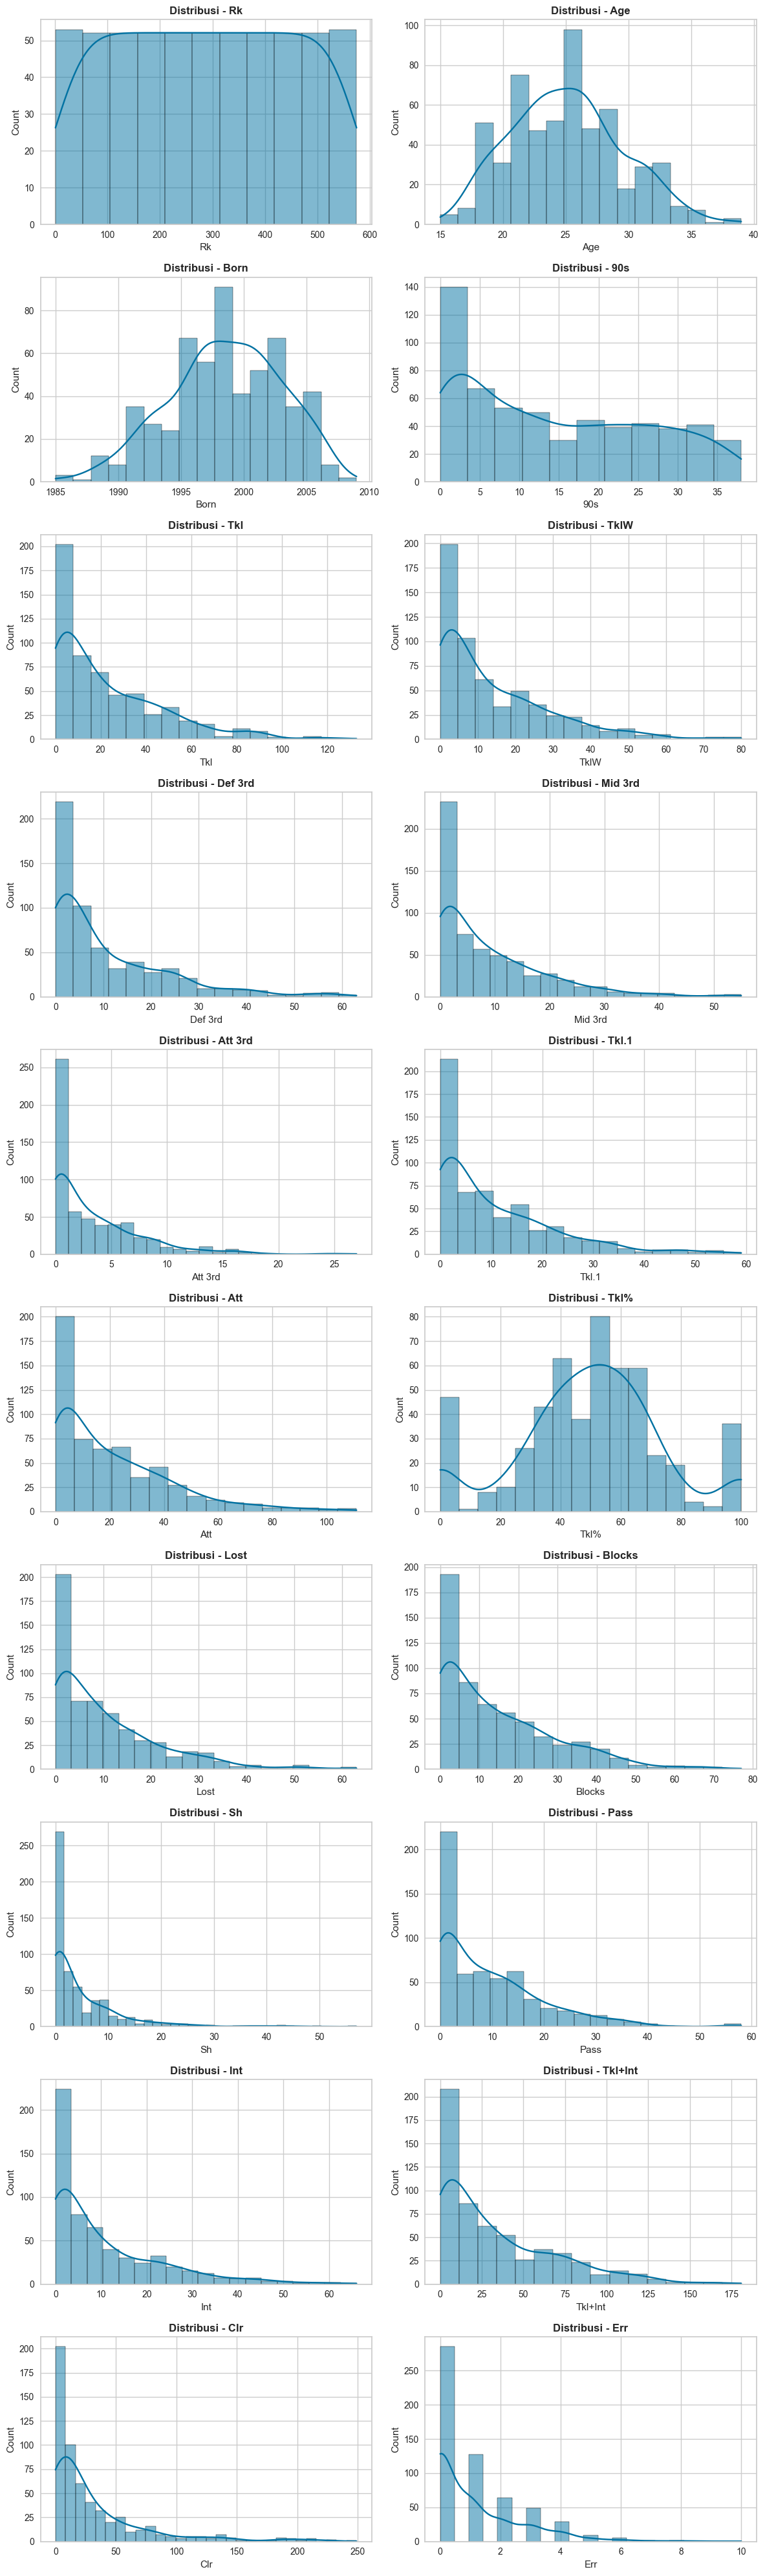

In [79]:
numerical_columns = df_def_stats.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)
cols = 2  # Jumlah kolom per baris
rows = math.ceil(num_cols / cols)  # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=df_def_stats, x=col, kde=True)
    plt.title(f'Distribusi - {col}', fontweight='bold')

plt.tight_layout()
plt.show()

Terlihat distribusi kolom-kolom numerikal tidak terdistribusi normal. Untuk itu, seluruh perhitungan statistik nantinya akan bisa  dihitung berdasarkan nilai mediannya karena lebih representatif dibandingkan dengan nilai rata-rata.

### Eksplorasi Data Pertahanan Berdasarkan Gol Kumulatif

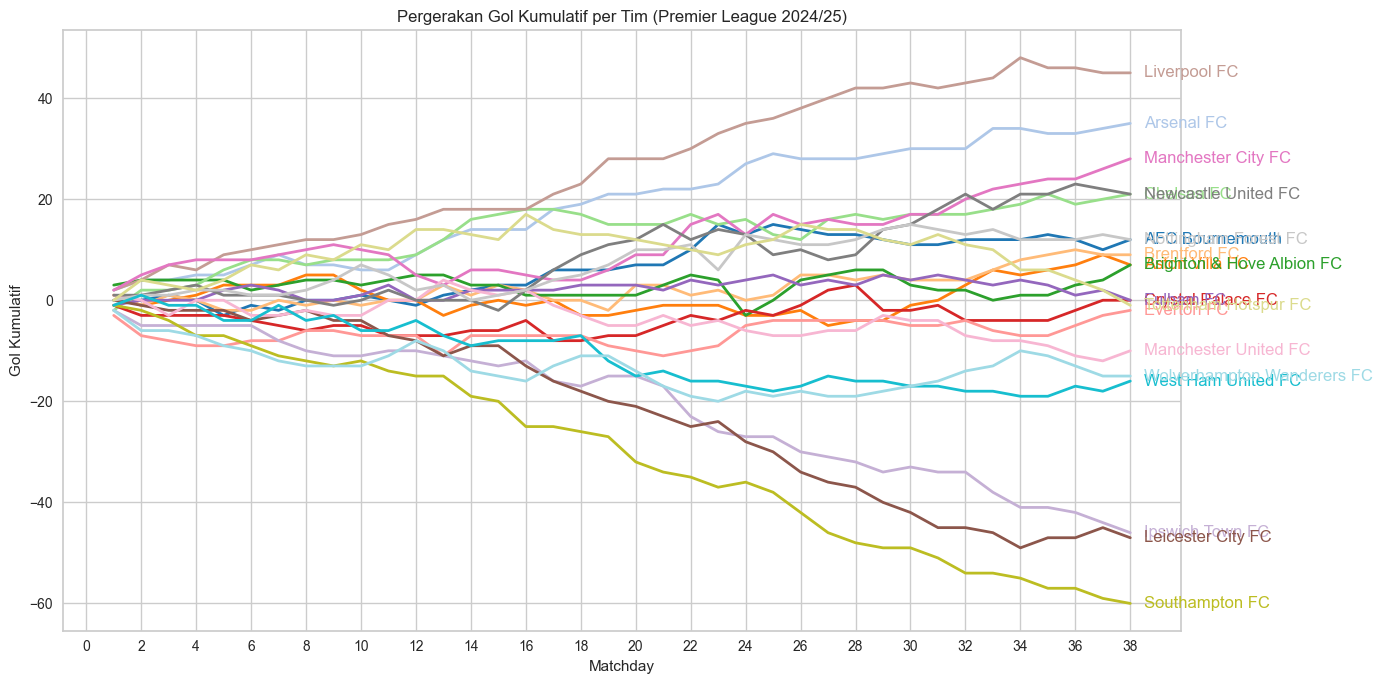

In [80]:
plt.figure(figsize=(14, 7))

colors = cm.tab20.colors  # palet kontras dengan 20 warna

for i, team in enumerate(df_kumulatif_gol.columns):
    if team != "matchday":  # skip kolom matchday kalau masih ada
        y = df_kumulatif_gol[team]
        x = df_kumulatif_gol.index
        plt.plot(x, y, label=team, linewidth=2, color=colors[i % len(colors)])
        
        # ambil titik terakhir
        plt.text(
            x.max() + 0.5,   # posisi x agak ke kanan
            y.iloc[-1],      # nilai y terakhir
            team,            # nama tim
            va="center", 
            fontsize=12, 
            color=colors[i % len(colors)]
        )

plt.xlabel("Matchday")
plt.ylabel("Gol Kumulatif")
plt.title("Pergerakan Gol Kumulatif per Tim (Premier League 2024/25)")

# grid setiap 2 matchday
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, linestyle="-", alpha=1)

plt.tight_layout()
plt.show()

Berdasarkan perolehan Gol Kumulatif, terlihat Southampton menjadi tim dengan catatan buruk. Ketiga tim ini juga menjadi tim yang terdegradasi dari Premier League karena hanya *finish* di posisi tiga terbawah di akhir musim. Oleh karena itu perlu diteliti lebih lanjut bagaimana data pertahanan mereka saat mengarungi laga Premier League 2024-2025.

##### Southampton
Southampton menjadi tim yang paling buruk dengan perolehan gol kumulatif sebanyak -60. Ini berarti Southampton memiliki rata-rata kebobolan sekitar 1,6 kali per pertandingan.

###### Error
Perhitungan Error dilakukan dengan berdasarkan kesalahan pemain yang menyebabkan tim lawan berpeluang untuk melakukan tembakan. Dari perhitungan ini, nantinya bisa dilihat siapa saja pemain yang banyak melakukan error dan bagaimana disiplinnya mereka dalam bertahan.

In [81]:
Def_team_err = df_def_stats.groupby("Squad", as_index=False)["Err"].sum()
Def_team_err = Def_team_err.sort_values(by="Err", ascending=False)
Def_team_err

,Squad,Err
16,Southampton,51
5,Chelsea,45
1,Aston Villa,43
17,Tottenham,41
9,Ipswich Town,39
12,Manchester City,35
14,Newcastle Utd,34
0,Arsenal,33
8,Fulham,33
11,Liverpool,31


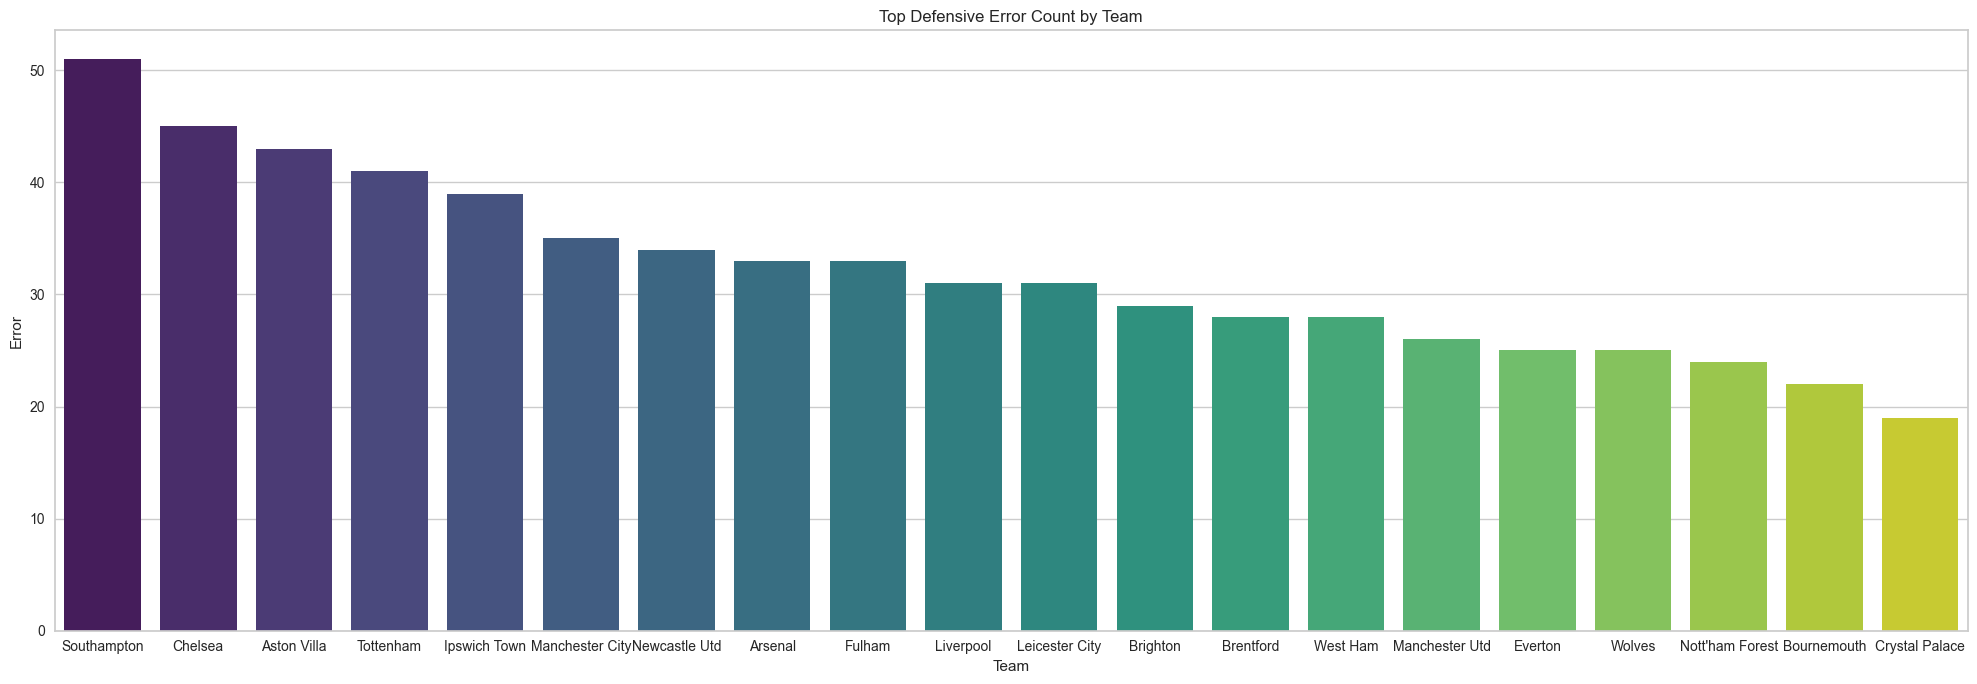

In [82]:
plt.figure(figsize=(20, 7))
sns.barplot(x='Squad', y='Err', data=Def_team_err, palette="viridis")
plt.title('Top Defensive Error Count by Team')
plt.xlabel('Team')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

Berdasarkan data tiap tim, jumlah error yang dilakukan oleh pemain Southampton menjadi yang tertinggi, yaitu 51 kali. Ini berarti ada banyak yang kelalaian yang dilakukan oleh pemain Southampton.

In [83]:
def_southampton = df_def_stats[df_def_stats["Squad"]=="Southampton"]
Worst_Def_Southampton = def_southampton.sort_values(by= "Err", ascending=False).head(10)
Worst_Def_Southampton

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
181,182,Mateus Fernandes,Portugal,MF,Southampton,20.0,2004.0,32.3,89,48,45,28,16,33,72,45.8,39,43,8,35,28,117,35,7
229,230,Taylor Harwood-Bellis,England,DF,Southampton,22.0,2002.0,31.4,28,20,13,12,3,19,35,54.3,16,65,43,22,30,58,141,6
49,50,Jan Bednarek,Poland,DF,Southampton,28.0,1996.0,28.1,36,19,23,13,0,16,31,51.6,15,47,36,11,56,92,190,5
148,149,Flynn Downes,England,MF,Southampton,25.0,1999.0,23.9,49,25,23,21,5,15,36,41.7,21,28,9,19,32,81,51,4
343,344,Alex McCarthy,England,GK,Southampton,34.0,1989.0,5.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,4
315,316,Joe Lumley,England,GK,Southampton,29.0,1995.0,3.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,3,3
32,33,Joe Aribo,Nigeria,"MF,DF",Southampton,28.0,1996.0,22.4,47,33,17,24,6,17,35,48.6,18,28,11,17,20,67,32,3
424,425,Aaron Ramsdale,England,GK,Southampton,26.0,1998.0,30.0,0,0,0,0,0,0,3,0.0,3,0,0,0,2,2,10,3
494,495,Yukinari Sugawara,Japan,"DF,MF",Southampton,24.0,2000.0,17.3,31,18,16,14,1,19,31,61.3,12,21,10,11,11,42,53,3
476,477,William Smallbone,Ireland,MF,Southampton,24.0,2000.0,7.7,20,13,9,9,2,7,22,31.8,15,8,0,8,2,22,14,2


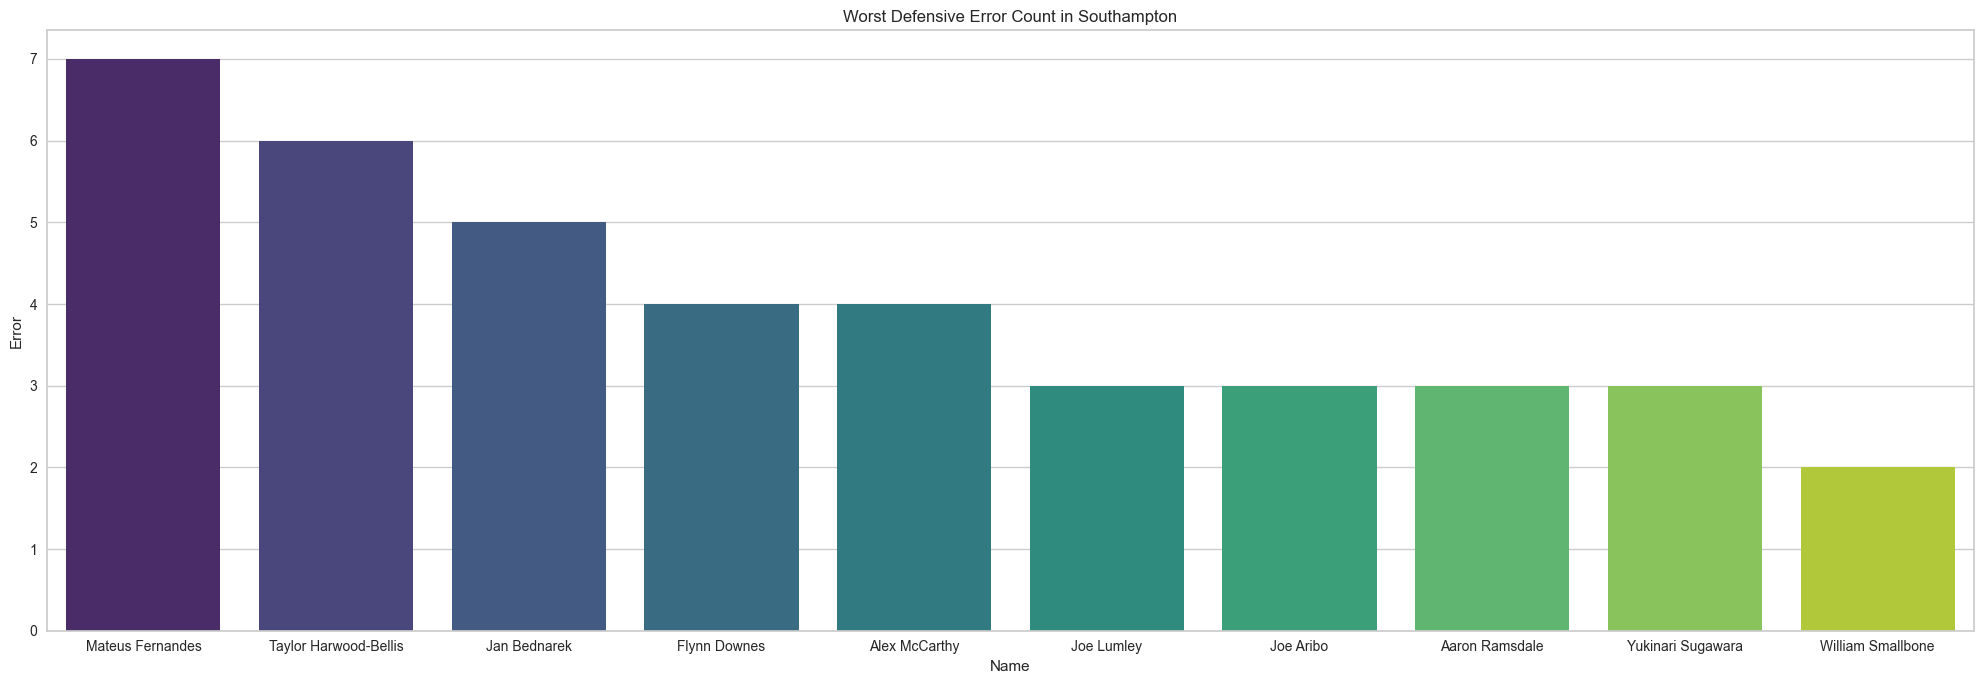

In [84]:
plt.figure(figsize=(20, 7))
sns.barplot(x='Player', y='Err', data=Worst_Def_Southampton, palette="viridis")
plt.title('Worst Defensive Error Count in Southampton')
plt.xlabel('Name')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

**Mateus Fernandes** menjadi pemain yang paling banyak melakukan kesalahan untuk Southampton. Ia melakukan 7 kali error yang membuat lawan berpeluang untuk melakukan tembakan. Lalu **Taylor Harwood-Bellis** (6 kali error) dan **Jan Bednarek** (5 kali error) menempati urutan 2 dan 3.

Untuk eksplorasi lebih lanjut, bagian error ini bisa ditelaah lebih lanjut dengan melihat bagian 90s(menit bermain dibagi 90 menit) untuk melihat berapa persen tingkat kesalahannya.

Selanjutnya untuk dapat mengukur lebih jauh tingkat error ini, dapat dibuat kolom baru yaitu `Error_Percentage` dimana hal ini akan berisi nilai persentase error yang dilakukan dibagi dengan jumlah pertandingan (`90s`).

In [85]:
Worst_Def_Southampton.sort_values(by= "90s", ascending=False)
Worst_Def_Southampton["Error_Percentage"] = (Worst_Def_Southampton["Err"]/Worst_Def_Southampton["90s"])*100
Worst_Def_Southampton = Worst_Def_Southampton.sort_values(by= "90s", ascending=False)

In [86]:
Worst_Def_Southampton

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Error_Percentage
181,182,Mateus Fernandes,Portugal,MF,Southampton,20.0,2004.0,32.3,89,48,45,28,16,33,72,45.8,39,43,8,35,28,117,35,7,21.671827
229,230,Taylor Harwood-Bellis,England,DF,Southampton,22.0,2002.0,31.4,28,20,13,12,3,19,35,54.3,16,65,43,22,30,58,141,6,19.108280
424,425,Aaron Ramsdale,England,GK,Southampton,26.0,1998.0,30.0,0,0,0,0,0,0,3,0.0,3,0,0,0,2,2,10,3,10.000000
49,50,Jan Bednarek,Poland,DF,Southampton,28.0,1996.0,28.1,36,19,23,13,0,16,31,51.6,15,47,36,11,56,92,190,5,17.793594
148,149,Flynn Downes,England,MF,Southampton,25.0,1999.0,23.9,49,25,23,21,5,15,36,41.7,21,28,9,19,32,81,51,4,16.736402
32,33,Joe Aribo,Nigeria,"MF,DF",Southampton,28.0,1996.0,22.4,47,33,17,24,6,17,35,48.6,18,28,11,17,20,67,32,3,13.392857
494,495,Yukinari Sugawara,Japan,"DF,MF",Southampton,24.0,2000.0,17.3,31,18,16,14,1,19,31,61.3,12,21,10,11,11,42,53,3,17.341040
476,477,William Smallbone,Ireland,MF,Southampton,24.0,2000.0,7.7,20,13,9,9,2,7,22,31.8,15,8,0,8,2,22,14,2,25.974026
343,344,Alex McCarthy,England,GK,Southampton,34.0,1989.0,5.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,4,80.000000
315,316,Joe Lumley,England,GK,Southampton,29.0,1995.0,3.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,3,3,100.000000


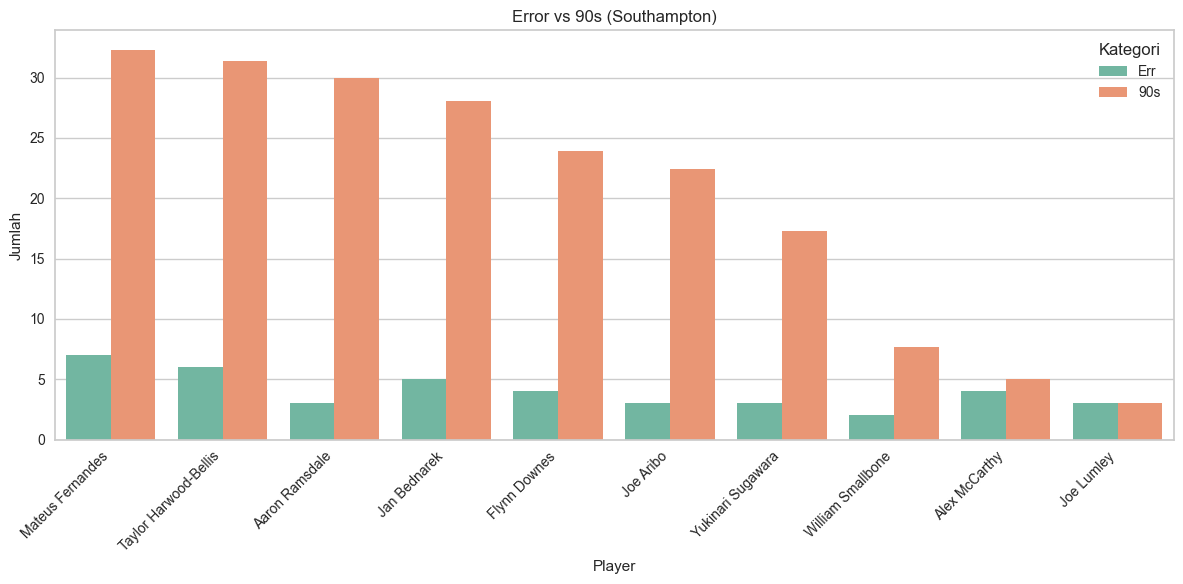

In [87]:
df_melt = Worst_Def_Southampton.melt(
    id_vars="Player", 
    value_vars=["Err", "90s"], 
    var_name="Kategori", 
    value_name="Jumlah"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Player",
    y="Jumlah", 
    hue="Kategori", 
    data=df_melt,
    palette="Set2"
)

plt.title("Error vs 90s (Southampton)")
plt.xlabel("Player")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Mateus Fernandes** melakukan 32 kali dari 38 pertandingan menandakan dirinya termasuk sebagai pemain utama yang sering dimainkan. Namun jumlah 7 kali error yang dilakukan juga menjadi yang terbanyak diantara pemain lain. Sebenarnya hal ini tidak menandakan nilai error yang besar, terlebih jika ia bermain banyak, kesempatan error juga bisa saja menjadi semakin besar. Akan tetapi persentase 7 kali kesalahan dalam 32 pertandingan ternyata cukup signifikan, yaitu disekitar 21 persen.

Lalu ada **Taylor Harwood-Bellis** yang juga bermain sebanyak 31,4 pertandingan. Dirinya mencatatkan nilai error terbanyak kedua dengan 6 kali error. Persentase error yang cukup siginfikan juga dicatatkan oleh pemain cadangan **William Smallbone**. Dari 7,7 pertandingan, ia melakukan kesalahan sebanyak 2 kali yang menjadikan persentase errornya adalah 25,9 persen.

Southampton nampaknya harus berbenah di sektor penjaga gawang. Pasalnya, ketiga nama penjaga gawang Southampton masuk ke dalam daftar 10 pemain dengan error terbanyak. **Aaron Ramsdale** (30 kali bermain, error 3 kali) sebenarnya cukup baik sebagai pemain utama dengan nilai persentase error 10%. Namun, **Alex McCarthy** dan **Joe Lumley** sebagai kiper cadangan performanya masih harus ditingkatkan. **Alex McCarthy** misalnya, ia bermain dalam 5 kali pertandingan mencatatkan error 4 kali (persentase 80%). Atau **Joe Lumley** yang diberi kesempatan bermain 3 kali, tapi juga mencatatkan error 3 kali (persentase 100%).

###### Tackle Umum

Bagian tackle perlu diperhatikan juga untuk menilai seberapa baik seorang pemain dalam bertahan. Dalam data yang tersedia, ternyata terdapat 2 kolom tackle yang ada, yaitu:
1. `Tkl`, `TklW`, `Def 3rd`, `Mid 3rd`, `Att 3rd`
    Definisi: jumlah pemain lawan yang berhasil ditackle (direbut bolanya).
    Konteks: umum, bisa dalam situasi apapun (open play), tidak spesifik lawan sedang menggiring bola.
    Contoh: bek merebut bola dari lawan lewat sliding tackle atau tekel berdiri, entah lawan lagi kontrol atau lagi menerima bola.
2. `Tkl.1`, `Att`, `Tkl%`, `Lost`
    Definisi: jumlah dribbler (pemain lawan yang sedang menggiring bola) yang berhasil ditackle.
    Konteks: lebih spesifik — hanya dihitung ketika lawan sedang melakukan dribble.
    Contoh: winger lawan mencoba melewati bek dengan dribbling, lalu bola berhasil direbut → dihitung sebagai dribbler tackled.

In [88]:
Def_team_tkl = df_def_stats.groupby("Squad", as_index=False)[["Tkl", "TklW"]].sum()
Def_team_tkl["Tkl_Percentage"] = (Def_team_tkl["TklW"]/Def_team_tkl["Tkl"])*100
Def_team_tkl = Def_team_tkl.sort_values(by="Tkl_Percentage", ascending=True)
Def_team_tkl

,Squad,Tkl,TklW,Tkl_Percentage
9,Ipswich Town,589,340,57.724958
2,Bournemouth,691,399,57.742402
16,Southampton,652,378,57.975460
0,Arsenal,598,348,58.193980
1,Aston Villa,637,372,58.398744
6,Crystal Palace,767,450,58.670143
19,Wolves,801,471,58.801498
7,Everton,732,433,59.153005
10,Leicester City,728,431,59.203297
18,West Ham,654,388,59.327217


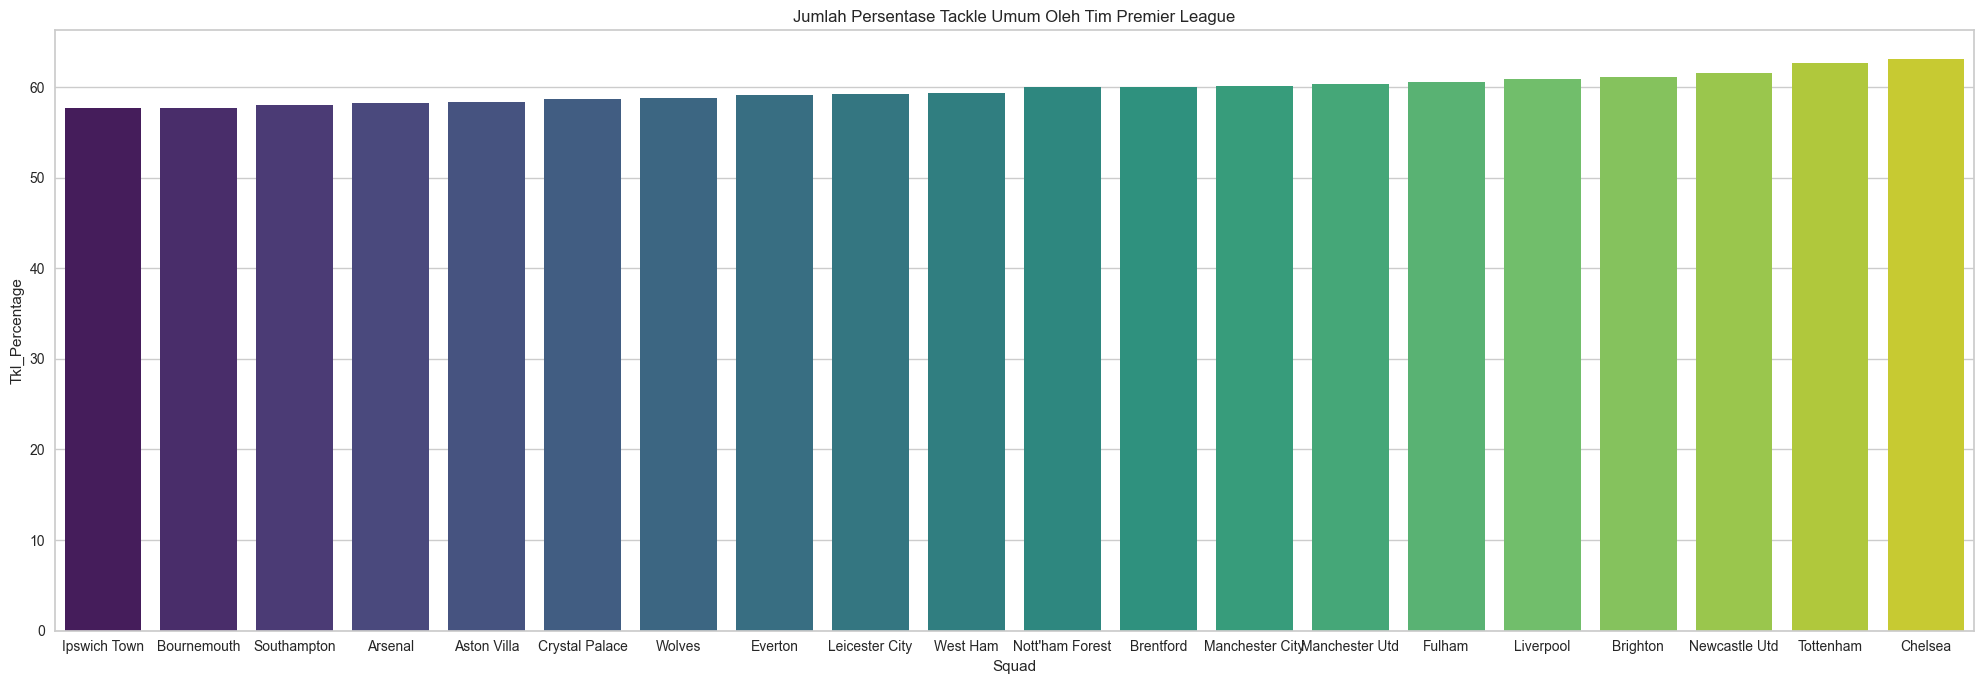

In [89]:
plt.figure(figsize=(20, 7))
sns.barplot(x='Squad', y='Tkl_Percentage', data=Def_team_tkl, palette="viridis")
plt.title('Jumlah Persentase Tackle Umum Oleh Tim Premier League')
plt.xlabel('Squad')
plt.ylabel('Tkl_Percentage')
plt.tight_layout()
plt.show()

Jumlah persentase tackle umum yang dimenangkan oleh Southampton ternyata masuk ke dalam tiga tim yang terendah. Southampton mencatatkan 57,9% tackle, hanya lebih baik dari Ipswich Town (57,72%) dan Bournemouth (57,74%). Ini membuktikan efektifitas tackle umum yang dilakukan oleh Southampton masih kurang efektif dari tim-tim lain, meskipun memang jarak persentase antar tim ini sangat minim.

Untuk melihat lebih detailnya, maka harus dicek berdasarkan para pemain yang berkontribusi.

In [90]:
def_southampton.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
12,13,Carlos Alcaraz,Argentina,MF,Southampton,21.0,2002.0,0.1,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,0,0
21,22,Samuel Amo-Ameyaw,England,"FW,DF",Southampton,18.0,2006.0,0.3,1,0,0,1,0,1,1,100.0,0,0,0,0,0,1,0,0
30,31,Cameron Archer,England,FW,Southampton,23.0,2001.0,16.0,13,8,8,3,2,2,9,22.2,7,5,1,4,2,15,11,0
32,33,Joe Aribo,Nigeria,"MF,DF",Southampton,28.0,1996.0,22.4,47,33,17,24,6,17,35,48.6,18,28,11,17,20,67,32,3
33,34,Adam Armstrong,England,"FW,MF",Southampton,27.0,1997.0,13.9,12,3,2,7,3,3,14,21.4,11,6,1,5,3,15,8,0


In [91]:
def_Southampton_Tkl = def_southampton[["Player","Pos", "Squad", "90s", "Tkl", "TklW", "Def 3rd", "Mid 3rd", "Att 3rd"]]
def_Southampton_Tkl["Tkl_Percentage"] = (def_Southampton_Tkl["TklW"]/def_Southampton_Tkl["Tkl"])*100
def_Southampton_Tkl = def_Southampton_Tkl.sort_values(by="TklW", ascending=False)
def_Southampton_Tkl = def_Southampton_Tkl.head(10)
def_Southampton_Tkl

,Player,Pos,Squad,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl_Percentage
181,Mateus Fernandes,MF,Southampton,32.3,89,48,45,28,16,53.932584
32,Joe Aribo,"MF,DF",Southampton,22.4,47,33,17,24,6,70.212766
540,Kyle Walker-Peters,DF,Southampton,32.4,44,29,22,15,7,65.909091
148,Flynn Downes,MF,Southampton,23.9,49,25,23,21,5,51.020408
527,Lesley Ugochukwu,MF,Southampton,18.4,50,24,16,30,4,48.000000
229,Taylor Harwood-Bellis,DF,Southampton,31.4,28,20,13,12,3,71.428571
488,Jack Stephens,DF,Southampton,15.4,34,20,25,9,0,58.823529
134,Tyler Dibling,"FW,MF",Southampton,20.8,34,20,13,18,3,58.823529
49,Jan Bednarek,DF,Southampton,28.1,36,19,23,13,0,52.777778
494,Yukinari Sugawara,"DF,MF",Southampton,17.3,31,18,16,14,1,58.064516


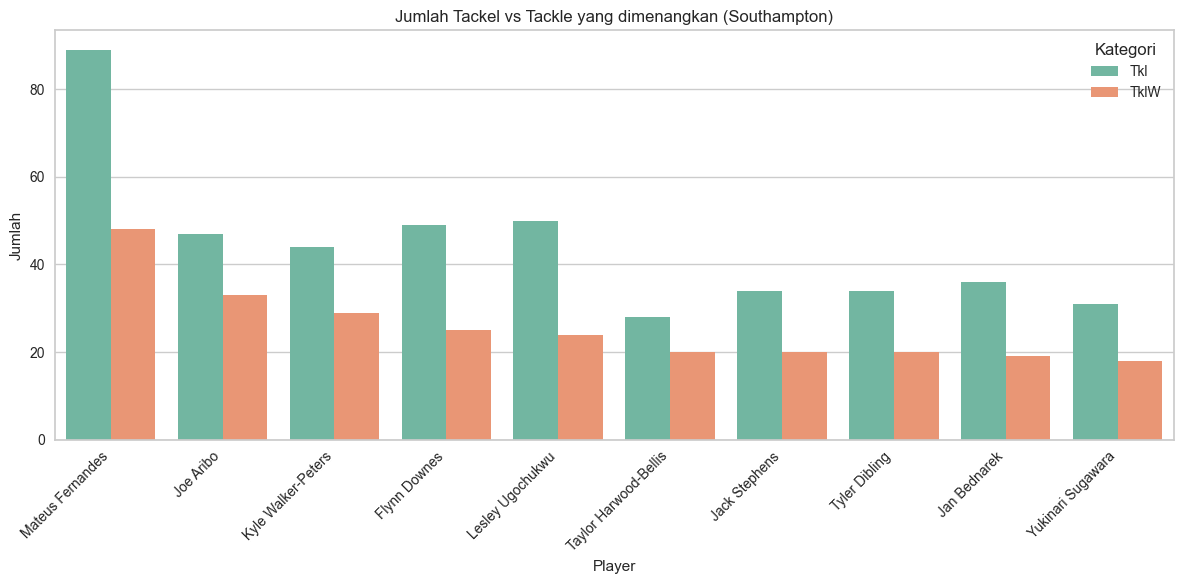

In [92]:
df_melt = def_Southampton_Tkl.melt(
    id_vars="Player", 
    value_vars=["Tkl", "TklW"], 
    var_name="Kategori", 
    value_name="Jumlah"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Player",
    y="Jumlah", 
    hue="Kategori", 
    data=df_melt,
    palette="Set2"
)

plt.title("Jumlah Tackel vs Tackle yang dimenangkan (Southampton)")
plt.xlabel("Player")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Jika sebelumnya **Mateus Fernandes** adalah pemain yang terburuk dalam hal error, kali ini dalam jumlah tackle umum dan tackle yang dimenangkan, ia menjadi pemain yang terbanyak melakukannya. Ada 89 kali jumlah tackle dan jumlah berhasil 48 kali yang ditorehkan dalam 32.3 pertandingan. Persentasenya (53.9%)  mungkin tidak setinggi pemain lain, namun agresifitas dan determinasi untuk memenangkan bola patut diapresiasi. **Mateus Fernandes** yang tercatat berposisi sebagai pemain tengah, namun jumlah tackle yang ia lakukan banyak sekali dilakukan di wilayah pertahanan (Def 3rd) dengan 45 kali tackle.

Selain itu, **Kyle Walker-Peters** yang bermain sebanyak 32,4 pertandingan (bermain terbanyak di antara pemain lain) mencatatkan persentase tackle yang cukup baik, yaitu 65.9% (44 tackle, 29 kali berhasil).

Di sisi lain, persentase terbaik dilakukan oleh	***Taylor Harwood-Bellis** dengan 71,4% (28 kali tackle, 20 kali berhasil dalam 31.4 pertandingan) dan **Joe Aribo** dengan 70,2% (47 kali tackle, 33 kali berhasil dalam 22,4 pertandingan).

###### Perbandingan Persentase Tackle Umum

Membandingkan persentase tackle umum Southampton dengan tim lain, antara lain:
1. Tottenham Hotspur dengan alasan, tim ini *finish* di posisi 17 (satu diatas zona degradasi)
2. Leicester City dengan alasan, perolehan gol kumulatifnya berada di atas Southampton
3. Crystal Palace dan Fulham dengan alasan perolehan gol kumulatif di akhir musim bernilai 0

Guideline pengerjaannya adalah:
1. Mengambil statistik pemain-pemain berdasarkan timnya
2. Membuat kolom `Tkl_Percentage` (menghitung persentase jumlah tackle yang dimenangkan berbanding total tackle yang dilakukan)
3. Mengurutkan berdasarkan jumlah `TklW` (tackle yang dimenangkan). Ini untuk mengurangi bias karena bisa saja, pemain dengan menit bermain sedikit lalu hanya melakukan 1 kali tackle dan berhasil maka persentasenya 100%. Akan tetapi, hal-hal seperti ini tidak bisa merefleksikan kejadian nyata. Maka dari itu sortir dilakukan berdasarkan jumlah tackle yang dimenangkan
4. Ambil 10 pemain teratas berdasarkan banyaknya tackle yang berhasil tersebut (`TklW`)

In [93]:
#Southampton
def_Southampton_Tkl = def_Southampton_Tkl.head(10)

#Tottenham
def_Tottenham = df_def_stats[df_def_stats["Squad"]=="Tottenham"]
def_Tottenham_Tkl = def_Tottenham[["Player","Pos", "Squad", "90s", "Tkl", "TklW", "Def 3rd", "Mid 3rd", "Att 3rd"]]
def_Tottenham_Tkl["Tkl_Percentage"] = (def_Tottenham_Tkl["TklW"]/def_Tottenham_Tkl["Tkl"])*100
def_Tottenham_Tkl = def_Tottenham_Tkl.sort_values(by="TklW", ascending=False)
def_Tottenham_Tkl = def_Tottenham_Tkl.head(10)

#Leicester City
def_Leicester = df_def_stats[df_def_stats["Squad"]=="Leicester City"]
def_Leicester_Tkl = def_Leicester[["Player","Pos", "Squad", "90s", "Tkl", "TklW", "Def 3rd", "Mid 3rd", "Att 3rd"]]
def_Leicester_Tkl["Tkl_Percentage"] = (def_Leicester_Tkl["TklW"]/def_Leicester_Tkl["Tkl"])*100
def_Leicester_Tkl = def_Leicester_Tkl.sort_values(by="TklW", ascending=False)
def_Leicester_Tkl = def_Leicester_Tkl.head(10)

#Crystal Palace
def_CrystalPalace = df_def_stats[df_def_stats["Squad"]=="Crystal Palace"]
def_CrystalPalace_Tkl = def_CrystalPalace[["Player","Pos", "Squad", "90s", "Tkl", "TklW", "Def 3rd", "Mid 3rd", "Att 3rd"]]
def_CrystalPalace_Tkl["Tkl_Percentage"] = (def_CrystalPalace_Tkl["TklW"]/def_CrystalPalace_Tkl["Tkl"])*100
def_CrystalPalace_Tkl = def_CrystalPalace_Tkl.sort_values(by="TklW", ascending=False)
def_CrystalPalace_Tkl = def_CrystalPalace_Tkl.head(10)

#Fulham
def_Fulham = df_def_stats[df_def_stats["Squad"]=="Fulham"]
def_Fulham_Tkl = def_Fulham[["Player","Pos", "Squad", "90s", "Tkl", "TklW", "Def 3rd", "Mid 3rd", "Att 3rd"]]
def_Fulham_Tkl["Tkl_Percentage"] = (def_Fulham_Tkl["TklW"]/def_Fulham_Tkl["Tkl"])*100
def_Fulham_Tkl = def_Fulham_Tkl.sort_values(by="TklW", ascending=False)
def_Fulham_Tkl = def_Fulham_Tkl.head(10)

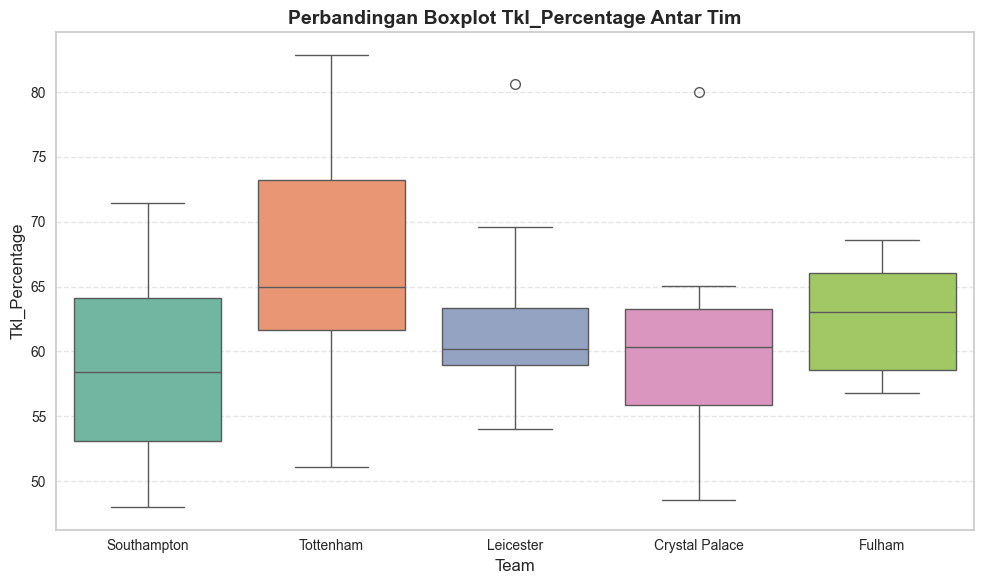

In [94]:
df_plot = pd.DataFrame({
    "Tkl_Percentage": pd.concat([
        def_Southampton_Tkl["Tkl_Percentage"],
        def_Tottenham_Tkl["Tkl_Percentage"],
        def_Leicester_Tkl["Tkl_Percentage"],
        def_CrystalPalace_Tkl["Tkl_Percentage"],
        def_Fulham_Tkl["Tkl_Percentage"]
    ], ignore_index=True),
    "Team": (["Southampton"] * len(def_Southampton_Tkl)
           + ["Tottenham"] * len(def_Tottenham_Tkl)
           + ["Leicester"] * len(def_Leicester_Tkl)
           + ["Crystal Palace"] * len(def_CrystalPalace_Tkl)
           + ["Fulham"] * len(def_Fulham_Tkl))
})

# plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_plot,
    x="Team",
    y="Tkl_Percentage",
    palette="Set2"
)

plt.title("Perbandingan Boxplot Tkl_Percentage Antar Tim", fontsize=14, weight="bold")
plt.xlabel("Team", fontsize=12)
plt.ylabel("Tkl_Percentage", fontsize=12)
plt.grid(axis="y", alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

Dari bentuk boxplot yang ada, terlihat variasi persentase tackle terbaik dari 10 pemain **Southampton** memiliki box yang lebih besar dari tim lain yang dijadikan pembanding. Ini berarti nilai persentase tackle-nya sangat bervariasi dan jarak antar nilainya juga cukup besar. Berbeda dengan tim-tim pembanding yang relatif lebih sempit luas boxnya (kecuali Tottenham, namun posisi box terlihat lebih tinggi dari tim lain).

Garis di dalam box artinya adalah nilai tengah atau median (saat data direntangkan dan diurutkan). Berdasarkan grafik yang ada, median dari **Southampton** memang yang paling rendah dibanding dengan Tottenham, Leicester City, Crystal Palace, dan Fulham. Memang tidak begitu jauh jarak mediannya dengan tim-tim lain, tapi dalam dunia olahraga hal-hal ini sangat bisa mempengaruhi performa tim, apalagi dalam mengarungi musim panjang dengan 38 kali pertandingan.

###### Tackle Terhadap Pembawa Bola
Setelah melihat analisa tackle umum yang dilakukan pemain Southampton, selanjutnya adalah melihat bagaimana Southampton melakukan penghentian terhadap lawan yang sedang membawa bola. Seperti yang sudah dijelaskan sebelumnya, bagian ini menggunakan data-data dari `Tkl.1`, `Att`, `Tkl%`, `Lost` dengan definisi:
1. `Tkl.1` = Jumlah tackle terhadap penggiring bola yang dimenangkan
2. `Att` = Jumlah percobaan tackle yang dilakukan
3. `Tkl%` = Persentase tackle terhadap penggiring yang dimenangkan berdasarkan jumlah percobaan
4. `Lost` = Jumlah tackle terhadap penggiring bola yang tidak berhasil

Tujuan dilakukannya analisa bagian ini adalah untuk melihat seberapa efektif tackle yang dilakukan oleh para pemain Southampton terhadap pemain lawan yang menggiring bola.

In [95]:
def_southampton_Tkl_dribler = def_southampton[["Player","Pos", "Squad", "90s", "Tkl.1", "Att", "Tkl%", "Lost"]]
def_southampton_Tkl_dribler = def_southampton_Tkl_dribler.sort_values(by="Tkl.1", ascending=False)
def_southampton_Tkl_dribler = def_southampton_Tkl_dribler.head(10)
def_southampton_Tkl_dribler

,Player,Pos,Squad,90s,Tkl.1,Att,Tkl%,Lost
181,Mateus Fernandes,MF,Southampton,32.3,33,72,45.8,39
494,Yukinari Sugawara,"DF,MF",Southampton,17.3,19,31,61.3,12
229,Taylor Harwood-Bellis,DF,Southampton,31.4,19,35,54.3,16
527,Lesley Ugochukwu,MF,Southampton,18.4,18,36,50.0,18
488,Jack Stephens,DF,Southampton,15.4,17,30,56.7,13
32,Joe Aribo,"MF,DF",Southampton,22.4,17,35,48.6,18
49,Jan Bednarek,DF,Southampton,28.1,16,31,51.6,15
134,Tyler Dibling,"FW,MF",Southampton,20.8,16,26,61.5,10
540,Kyle Walker-Peters,DF,Southampton,32.4,16,35,45.7,19
148,Flynn Downes,MF,Southampton,23.9,15,36,41.7,21


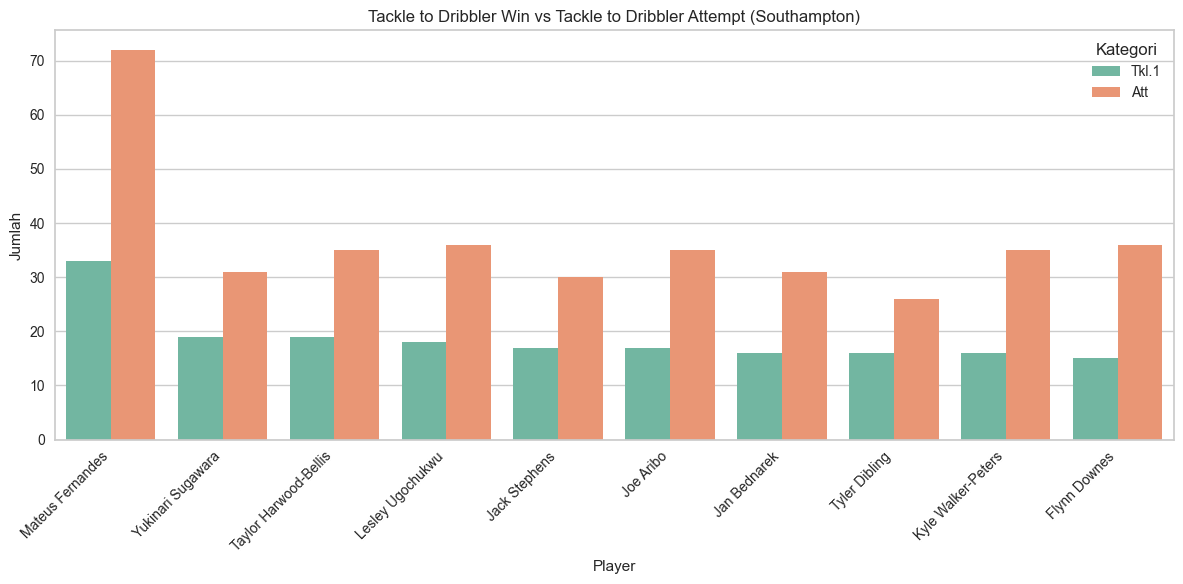

In [96]:
df_melt = def_southampton_Tkl_dribler.melt(
    id_vars="Player", 
    value_vars=["Tkl.1", "Att"], 
    var_name="Kategori", 
    value_name="Jumlah"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Player",
    y="Jumlah", 
    hue="Kategori", 
    data=df_melt,
    palette="Set2"
)

plt.title("Tackle to Dribbler Win vs Tackle to Dribbler Attempt (Southampton)")
plt.xlabel("Player")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Mateus Fernandes** kembali menjadi yang terbanyak melakukan percobaan penghentian terhadap lawan yang menggiring bola. Ia melakukan 72 kali percobaan selama semusim, namun jumlah yang ia menangkan hanya 33 kali membuat catatan persentasenya hanya sebesar 45,8%.

Permasalahannya terlihat dari jarak nilai tackle yang dilakukan (baik total percobaan, maupun total tackle yang dimenangkan) antara **Mateus Fernandes** dengan rekan-rekan lain setimnya. Dengan **Yukinari Sugawara** misalnya yang berada di posisi kedua teratas dalam hal memenangkan tackle terhadap penggiring bola. **Yukinari Sugawara** hanya mencatatkan 19 kali menang tackle. Jarak yang cukup signifikan dengan Mateus Fernandes (33 kali menang tackle terhadap penggiring bola).

Dari sisi jumlah percobaan **Lesley Ugochukwu** menjadi yang terbanyak kedua setelah **Mateus Fernandes** dengan 36 kali percobaan tackle terhadap penggiring bola. Jumlah ini hanya berkisar setengah dari apa yang dilakukan **Mateus Fernandes** (72 kali percobaan).

Pada bagian ini terlihat jelas bagaimana Southampton sangat bergantung dengan **Mateus Fernandes** dalah hal menahan serangan penggiring bola lawan.

###### Perbandingan Persentase Tackle Terhadap Dribbler

In [97]:
Def_team_tkl_Dribbler = df_def_stats.groupby("Squad", as_index=False)[["Tkl.1", "Att"]].sum()
Def_team_tkl_Dribbler["Tkl%"] = (Def_team_tkl_Dribbler["Tkl.1"]/Def_team_tkl_Dribbler["Att"])*100
Def_team_tkl_Dribbler = Def_team_tkl_Dribbler.sort_values(by="Tkl%", ascending=True)
Def_team_tkl_Dribbler

,Squad,Tkl.1,Att,Tkl%
9,Ipswich Town,281,604,46.523179
12,Manchester City,214,449,47.661470
16,Southampton,280,584,47.945205
2,Bournemouth,301,627,48.006380
10,Leicester City,336,695,48.345324
17,Tottenham,296,598,49.498328
4,Brighton,350,703,49.786629
6,Crystal Palace,324,643,50.388802
0,Arsenal,260,515,50.485437
14,Newcastle Utd,306,604,50.662252


Terlihat persentase tackle terhadap penggiring bola yang dilakukan oleh **Southampton** masuk ke dalam 3 tim terendah. Hanya lebih baik dari pada Ipswich Town dan Manchester City.

Membandingkan persentase tackle terhadap penggiring bola Southampton dengan tim lain, antara lain:
1. Tottenham Hotspur dengan alasan, tim ini *finish* di posisi 17 (satu diatas zona degradasi)
2. Leicester City dengan alasan, perolehan gol kumulatifnya berada di atas Southampton
3. Crystal Palace dan Fulham dengan alasan perolehan gol kumulatif di akhir musim bernilai 0

In [98]:
#Tottenham
def_Tottenham = df_def_stats[df_def_stats["Squad"]=="Tottenham"]
def_Tottenham_Tkl_Dribbler = def_Tottenham[["Player","Pos", "Squad", "90s", "Tkl.1", "Att", "Tkl%", "Lost"]]
def_Tottenham_Tkl_Dribbler = def_Tottenham_Tkl_Dribbler.sort_values(by="Tkl.1", ascending=False)
def_Tottenham_Tkl_Dribbler = def_Tottenham_Tkl_Dribbler.head(10)

#Leicester City
def_Leicester = df_def_stats[df_def_stats["Squad"]=="Leicester City"]
def_Leicester_Tkl_Dribbler = def_Leicester[["Player","Pos", "Squad", "90s", "Tkl.1", "Att", "Tkl%", "Lost"]]
def_Leicester_Tkl_Dribbler = def_Leicester_Tkl_Dribbler.sort_values(by="Tkl.1", ascending=False)
def_Leicester_Tkl_Dribbler = def_Leicester_Tkl_Dribbler.head(10)

#Crystal Palace
def_CrystalPalace = df_def_stats[df_def_stats["Squad"]=="Crystal Palace"]
def_CrystalPalace_Tkl_Dribbler = def_CrystalPalace[["Player","Pos", "Squad", "90s", "Tkl.1", "Att", "Tkl%", "Lost"]]
def_CrystalPalace_Tkl_Dribbler = def_CrystalPalace_Tkl_Dribbler.sort_values(by="Tkl.1", ascending=False)
def_CrystalPalace_Tkl_Dribbler = def_CrystalPalace_Tkl_Dribbler.head(10)

#Fulham
def_Fulham = df_def_stats[df_def_stats["Squad"]=="Fulham"]
def_Fulham_Tkl_Dribbler = def_Fulham[["Player","Pos", "Squad", "90s", "Tkl.1", "Att", "Tkl%", "Lost"]]
def_Fulham_Tkl_Dribbler = def_Fulham_Tkl_Dribbler.sort_values(by="Tkl.1", ascending=False)
def_Fulham_Tkl_Dribbler = def_Fulham_Tkl_Dribbler.head(10)

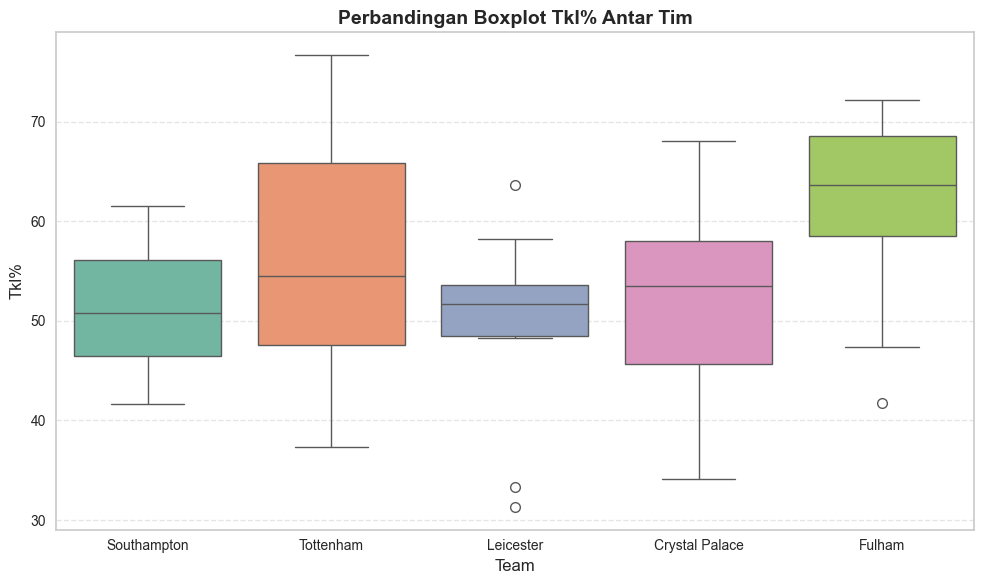

In [99]:
df_plot = pd.DataFrame({
    "Tkl_Percentage": pd.concat([
        def_southampton_Tkl_dribler["Tkl%"],
        def_Tottenham_Tkl_Dribbler["Tkl%"],
        def_Leicester_Tkl_Dribbler["Tkl%"],
        def_CrystalPalace_Tkl_Dribbler["Tkl%"],
        def_Fulham_Tkl_Dribbler["Tkl%"]
    ], ignore_index=True),
    "Team": (["Southampton"] * len(def_Southampton_Tkl)
           + ["Tottenham"] * len(def_Tottenham_Tkl)
           + ["Leicester"] * len(def_Leicester_Tkl)
           + ["Crystal Palace"] * len(def_CrystalPalace_Tkl)
           + ["Fulham"] * len(def_Fulham_Tkl))
})

# plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_plot,
    x="Team",
    y="Tkl_Percentage",
    palette="Set2"
)

plt.title("Perbandingan Boxplot Tkl% Antar Tim", fontsize=14, weight="bold")
plt.xlabel("Team", fontsize=12)
plt.ylabel("Tkl%", fontsize=12)
plt.grid(axis="y", alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

Kembali, terlihat median dari persentase tackle yang berhasil dilakukan **Southampton** menjadi yang paling rendah diantara yang lain. Hal ini mengindikasikan adanya inefektifitas pertahanan yang dilakukan **Southampton** dibanding dengan tim lain yang dijadikan pembanding.

###### Blocks

Metrik selanjutnya adalah melihat jumlah block yang dilakukan. Metrik ini diperlukan untuk memahami situasi pertahanan tim saat sedang diserang oleh tim lawan. Bagian ini menggunakan data-data dari:
1. `Blocks` = Jumlah total blokir
2. `Sh` = Jumlah blokir tembakan lawan
3. `Pass` = Jumlah blokir operan lawan

In [100]:
def_southampton_Tkl_block = def_southampton[["Player","Pos", "Squad", "90s", "Blocks", "Sh", "Pass"]]
def_southampton_Tkl_block = def_southampton_Tkl_block.sort_values(by="Blocks", ascending=False)
def_southampton_Tkl_block = def_southampton_Tkl_block.head(10)
def_southampton_Tkl_block

,Player,Pos,Squad,90s,Blocks,Sh,Pass
229,Taylor Harwood-Bellis,DF,Southampton,31.4,65,43,22
49,Jan Bednarek,DF,Southampton,28.1,47,36,11
181,Mateus Fernandes,MF,Southampton,32.3,43,8,35
32,Joe Aribo,"MF,DF",Southampton,22.4,28,11,17
148,Flynn Downes,MF,Southampton,23.9,28,9,19
527,Lesley Ugochukwu,MF,Southampton,18.4,27,10,17
540,Kyle Walker-Peters,DF,Southampton,32.4,27,15,12
494,Yukinari Sugawara,"DF,MF",Southampton,17.3,21,10,11
329,Ryan Manning,"DF,MF",Southampton,16.2,20,11,9
488,Jack Stephens,DF,Southampton,15.4,20,13,7


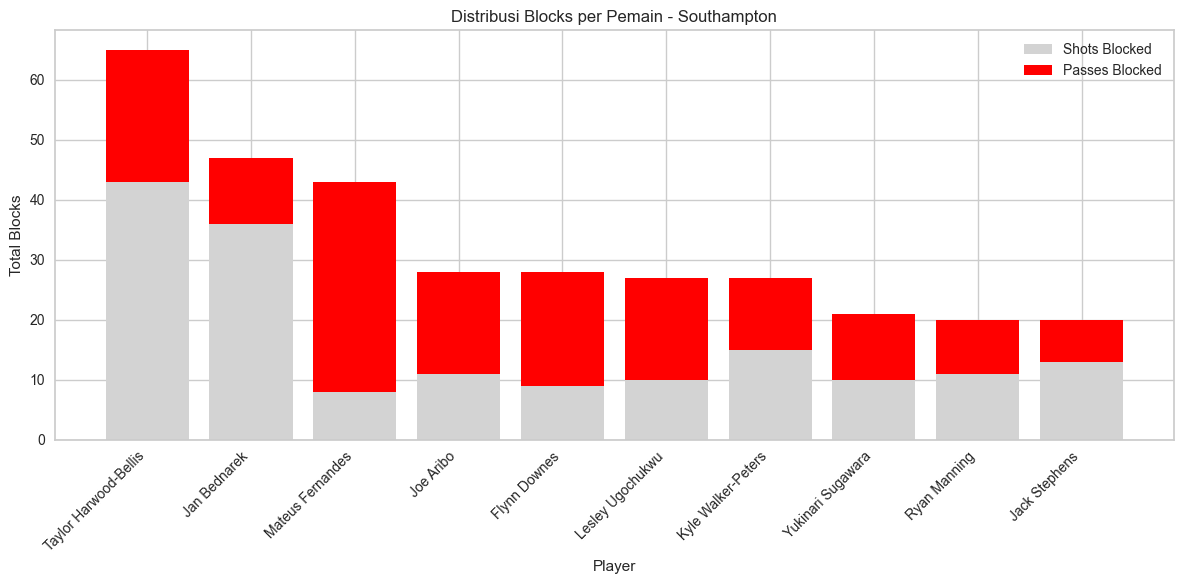

In [101]:
# Ambil data
players = def_southampton_Tkl_block["Player"]
sh = def_southampton_Tkl_block["Sh"]
ps = def_southampton_Tkl_block["Pass"]

# Posisi x
x = np.arange(len(players))

plt.figure(figsize=(12,6))

# Bar pertama (Shots Blocked)
plt.bar(x, sh, label="Shots Blocked", color="lightgray")

# Bar kedua ditumpuk di atasnya (Passes Blocked)
plt.bar(x, ps, bottom=sh, label="Passes Blocked", color="red")

# Label, title, dan axis
plt.xticks(x, players, rotation=45, ha="right")  # pakai nama player
plt.xlabel("Player")
plt.ylabel("Total Blocks")
plt.title("Distribusi Blocks per Pemain - Southampton")
plt.legend()

plt.tight_layout()
plt.show()

**Taylor Harwood-Bellis** menjadi pemain yang paling banyak melakukan blok terhadap pemain lawan. Ia mencatatkan 65 kali blok dengan proporsi 43 kali blokir tembakan, dan 22 blokir umpan. Jumlah blokir tembakannya juga menjadi yang terbanyak diantara rekan satu timnya.

Kembali, nama **Mateus Fernandes** masuk ke daftar ini dengan berada di posisi ketiga. Ia mencatatkan 43 kali blok dengan proporsi 8 kali blokir tembakan, dan 35 kali blokir umpan. Jumlah blokir umpannya juga menjadi yang terbanyak.

###### Perbandingan Jumlah blokir

In [102]:
df_def_stats.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,1,Max Aarons,England,DF,Bournemouth,24.0,2000.0,1.0,2,2,1,1,0,1,1,100.0,0,3,1,2,1,3,0,0
1,2,Joshua Acheampong,England,DF,Chelsea,18.0,2006.0,1.9,2,1,2,0,0,2,2,100.0,0,1,0,1,1,3,2,0
2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,21.8,83,50,26,49,8,39,72,54.2,33,33,10,23,32,115,42,0
3,4,Tosin Adarabioyo,England,DF,Chelsea,26.0,1997.0,15.7,17,13,11,6,0,8,12,66.7,4,9,7,2,11,28,80,0
4,5,Simon Adingra,Ivory Coast,"FW,MF",Brighton,22.0,2002.0,12.2,23,14,10,8,5,10,26,38.5,16,12,0,12,8,31,6,2


In [103]:
Def_team_block = df_def_stats.groupby("Squad", as_index=False)[["Blocks", "Sh", "Pass"]].sum()
Def_team_block = Def_team_block.sort_values(by="Blocks", ascending=False)
Def_team_block

,Squad,Blocks,Sh,Pass
10,Leicester City,505,198,307
6,Crystal Palace,485,144,341
3,Brentford,480,199,281
2,Bournemouth,459,136,323
17,Tottenham,448,159,289
18,West Ham,440,169,271
4,Brighton,439,122,317
19,Wolves,437,137,300
9,Ipswich Town,436,185,251
16,Southampton,433,201,232


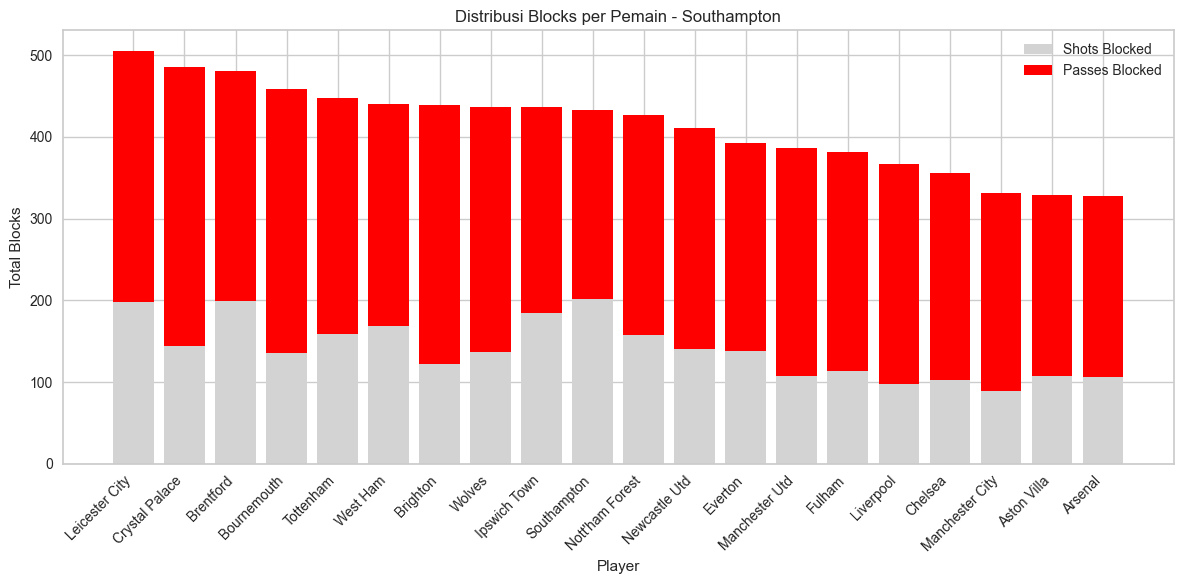

In [104]:
# Ambil data
players = Def_team_block["Squad"]
sh = Def_team_block["Sh"]
ps = Def_team_block["Pass"]

# Posisi x
x = np.arange(len(players))

plt.figure(figsize=(12,6))

# Bar pertama (Shots Blocked)
plt.bar(x, sh, label="Shots Blocked", color="lightgray")

# Bar kedua ditumpuk di atasnya (Passes Blocked)
plt.bar(x, ps, bottom=sh, label="Passes Blocked", color="red")

# Label, title, dan axis
plt.xticks(x, players, rotation=45, ha="right")  # pakai nama player
plt.xlabel("Player")
plt.ylabel("Total Blocks")
plt.title("Distribusi Blocks per Pemain - Southampton")
plt.legend()

plt.tight_layout()
plt.show()

Posisi **Southampton** berada di tengah-tengah (posisi 10 dari 20 tim) dengan total blokir 433 kali. Jumlah yang terbilang biasa saja untuk ukuran blokir, tidak buruk, tapi juga tidak bisa dibilang bagusl. Akan tetapi insight yang menarik dapat diambil dari performa **Southampton** adalah jumlah blokir tembakan (`Sh`) yang cukup tinggi. Itu berarti, **Southampton** mengalami serangan yang berbuah tembakan dari tim lain tinggi. Ini juga dapat dikonfirmasi melalui jumlah gol yang bersarang di gawang **Southampton** juga sangat banyak.

In [105]:
def_southampton_Tkl_block

,Player,Pos,Squad,90s,Blocks,Sh,Pass
229,Taylor Harwood-Bellis,DF,Southampton,31.4,65,43,22
49,Jan Bednarek,DF,Southampton,28.1,47,36,11
181,Mateus Fernandes,MF,Southampton,32.3,43,8,35
32,Joe Aribo,"MF,DF",Southampton,22.4,28,11,17
148,Flynn Downes,MF,Southampton,23.9,28,9,19
527,Lesley Ugochukwu,MF,Southampton,18.4,27,10,17
540,Kyle Walker-Peters,DF,Southampton,32.4,27,15,12
494,Yukinari Sugawara,"DF,MF",Southampton,17.3,21,10,11
329,Ryan Manning,"DF,MF",Southampton,16.2,20,11,9
488,Jack Stephens,DF,Southampton,15.4,20,13,7


In [106]:
def_Tottenham = df_def_stats[df_def_stats["Squad"]=="Tottenham"]
def_Tottenham_Tkl_block = def_Tottenham[["Player","Pos", "Squad", "90s", "Blocks", "Sh", "Pass"]]
def_Tottenham_Tkl_block = def_Tottenham_Tkl_block.sort_values(by="Blocks", ascending=False)
def_Tottenham_Tkl_block = def_Tottenham_Tkl_block.head(10)

#Leicester City
def_Leicester = df_def_stats[df_def_stats["Squad"]=="Leicester City"]
def_Leicester_Tkl_block = def_Leicester[["Player","Pos", "Squad", "90s", "Blocks", "Sh", "Pass"]]
def_Leicester_Tkl_block = def_Leicester_Tkl_block.sort_values(by="Blocks", ascending=False)
def_Leicester_Tkl_block = def_Leicester_Tkl_block.head(10)

#Crystal Palace
def_CrystalPalace = df_def_stats[df_def_stats["Squad"]=="Crystal Palace"]
def_CrystalPalace_Tkl_block = def_CrystalPalace[["Player","Pos", "Squad", "90s", "Blocks", "Sh", "Pass"]]
def_CrystalPalace_Tkl_block = def_CrystalPalace_Tkl_block.sort_values(by="Blocks", ascending=False)
def_CrystalPalace_Tkl_block = def_CrystalPalace_Tkl_block.head(10)

#Fulham
def_Fulham = df_def_stats[df_def_stats["Squad"]=="Fulham"]
def_Fulham_Tkl_block = def_Fulham[["Player","Pos", "Squad", "90s", "Blocks", "Sh", "Pass"]]
def_Fulham_Tkl_block = def_Fulham_Tkl_block.sort_values(by="Blocks", ascending=False)
def_Fulham_Tkl_block = def_Fulham_Tkl_block.head(10)

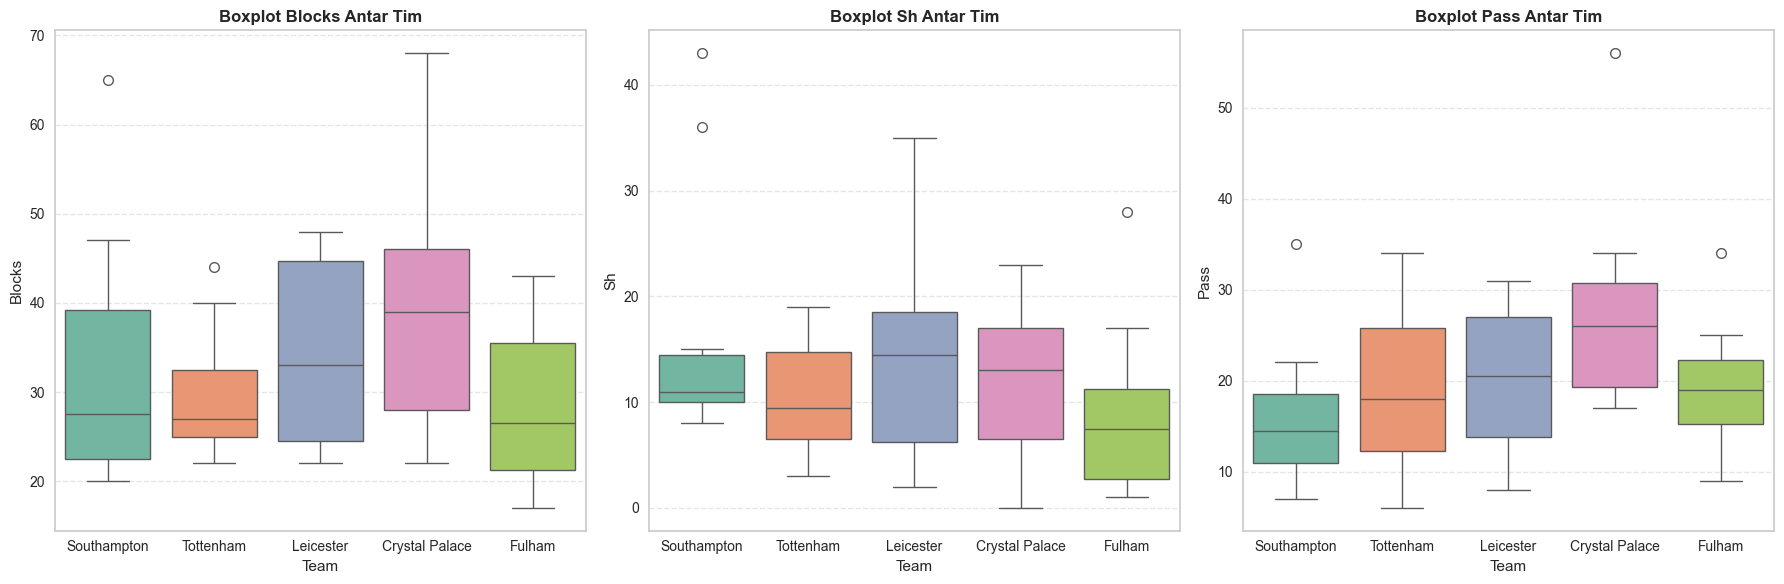

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

df_blocks = pd.DataFrame({
    "Value": pd.concat([
        def_southampton_Tkl_block["Blocks"],
        def_Tottenham_Tkl_block["Blocks"],
        def_Leicester_Tkl_block["Blocks"],
        def_CrystalPalace_Tkl_block["Blocks"],
        def_Fulham_Tkl_block["Blocks"]
    ], ignore_index=True),
    "Team": (["Southampton"] * len(def_Southampton_Tkl)
           + ["Tottenham"] * len(def_Tottenham_Tkl)
           + ["Leicester"] * len(def_Leicester_Tkl)
           + ["Crystal Palace"] * len(def_CrystalPalace_Tkl)
           + ["Fulham"] * len(def_Fulham_Tkl))
})

sns.boxplot(data=df_blocks, x="Team", y="Value", palette="Set2", ax=axes[0])
axes[0].set_title("Boxplot Blocks Antar Tim", fontsize=12, weight="bold")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Blocks")
axes[0].grid(axis="y", alpha=0.5, linestyle="--")

df_sh = pd.DataFrame({
    "Value": pd.concat([
        def_southampton_Tkl_block["Sh"],
        def_Tottenham_Tkl_block["Sh"],
        def_Leicester_Tkl_block["Sh"],
        def_CrystalPalace_Tkl_block["Sh"],
        def_Fulham_Tkl_block["Sh"]
    ], ignore_index=True),
    "Team": (["Southampton"] * len(def_Southampton_Tkl)
           + ["Tottenham"] * len(def_Tottenham_Tkl)
           + ["Leicester"] * len(def_Leicester_Tkl)
           + ["Crystal Palace"] * len(def_CrystalPalace_Tkl)
           + ["Fulham"] * len(def_Fulham_Tkl))
})

sns.boxplot(data=df_sh, x="Team", y="Value", palette="Set2", ax=axes[1])
axes[1].set_title("Boxplot Sh Antar Tim", fontsize=12, weight="bold")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("Sh")
axes[1].grid(axis="y", alpha=0.5, linestyle="--")

df_pass = pd.DataFrame({
    "Value": pd.concat([
        def_southampton_Tkl_block["Pass"],
        def_Tottenham_Tkl_block["Pass"],
        def_Leicester_Tkl_block["Pass"],
        def_CrystalPalace_Tkl_block["Pass"],
        def_Fulham_Tkl_block["Pass"]
    ], ignore_index=True),
    "Team": (["Southampton"] * len(def_Southampton_Tkl)
           + ["Tottenham"] * len(def_Tottenham_Tkl)
           + ["Leicester"] * len(def_Leicester_Tkl)
           + ["Crystal Palace"] * len(def_CrystalPalace_Tkl)
           + ["Fulham"] * len(def_Fulham_Tkl))
})

sns.boxplot(data=df_pass, x="Team", y="Value", palette="Set2", ax=axes[2])
axes[2].set_title("Boxplot Pass Antar Tim", fontsize=12, weight="bold")
axes[2].set_xlabel("Team")
axes[2].set_ylabel("Pass")
axes[2].grid(axis="y", alpha=0.5, linestyle="--")

# Layout rapi
plt.tight_layout()
plt.show()


**Southampton** terlihat bukan sebagai tim yang dominan dalam hal pertahanan berbasis blok jika dibandingkan dengan tim lain. Dari sisi blok total, distribusi mereka relatif rendah. Memang ada satu atau dua pemain yang menjadi pengecualian dengan catatan blok yang tinggi, namun secara keseluruhan sebagian besar pemain **Southampton** berada di bawah rata-rata bila disandingkan dengan tim seperti Leicester atau Crystal Palace.

Pada aspek blok tembakan, performa **Southampton** tampak cukup stabil dan konsisten. Median mereka tidak jauh berbeda dengan Tottenham, meski tetap kalah dari Leicester. Namun pola ini memperlihatkan bahwa kontribusi terbesar dalam kategori ini masih sangat bergantung pada segelintir pemain, bukan keseluruhan tim.

Sementara itu, kelemahan paling jelas terlihat dari blok umpan. **Southampton** memiliki median yang paling rendah dibanding tim lain, bahkan distribusinya sempit sehingga variasi antar pemain pun minim. Hal ini menandakan bahwa lini pressing mereka kurang agresif dalam memotong jalur umpan lawan.

Secara keseluruhan, **Southampton** menunjukkan kecenderungan pertahanan yang tidak terlalu kuat dalam hal blok. Mereka sesekali bergantung pada individu yang menonjol, tetapi secara kolektif terutama dalam mencegah aliran bola lawan, performanya masih tertinggal.

# Kesimpulan

Pertahanan **Southampton** selama musim 2024-2025 terlihat sangat kurang baik. Mulai dari tingkat error yang menjadi tertinggi diantara tim-tim lain, lalu masuk ke dalam 3 terkecil dalam hal jumlah tackle (baik tackle umum, maupun tackle terhadap penggiring bola). Pada parameter jumlah block, **Southampton** bisa dikatakan sudah cukup baik, namun, ada insight tersendiri yang didapatkan oleh **Southampton** yaitu terkait jumlah blok tembakan langsung yang tinggi. Ini mengindikasikan adanya jumlah serangan yang tinggi dari tim-tim lain yang berhasil melakukan tembakan ke **Southampton**.

Dari sisi pemain, terlihat jelas **Southampton** bergantung pada pemain tengah mereka yaitu **Mateus Fernandes**. Adapun rincian dari **Mateus Fernandes** adalah sebagai berikut:
1. Error
**Mateus Fernandes** adalah salah satu pemain yang sering bermain di tim **Southampton**. Ia tercatat bermain sebanyak 32,3 kali bermain. Namun dalam data error, **Mateus Fernandes** ternyata menjadi pemain yang paling banyak melakukan error, yaitu sebanyak 7 kali.
2. Tackle Umum
**Mateus Fernandes** menjadi pemain yang melakukan tackle terbanyak di tim **Southampton** dengan 89 kali tackle. Namun, jumlah memenangkan tacklenya hanya di angka 48. Ini berarti persentase tackle-nya hanya sekitar 53,9%. Jumlah yang cukup rendah
3. Tackle Terhadap Pembawa Bola
**Mateus Fernandes** juga menjadi pemain dengan jumlah tackle terhadap penggiring bola lawan terbanyak, yaitu sebanyak 72 kali percobaan dan memenangkan hanya 33 kali (persentase 45,8%). Meski persentasenya kecil, tapi jumlahnya sangat besar dibanding rekan satu timnya. Ini mengindikasikan bahwa dirinya memang yang paling diandalkan di tim **Southampton**
4. Blocking
**Mateus Fernandes** menjadi pemain nomor tiga dengan jumlah blok terbanyak. Pemain yang diatasnya adalah **Taylor Harwood-Bellis** dan **Jan Bednarek** yang berposisi sebagai bek. Akan tetapi **Mateus Fernandes** yang berposisi sebagai pemain tengah ini ternyata paling sering terlihat melakukan bloking terhadap umpan lawan.

Berdasarkan empat metrik di atas, bisa disimpulkan tim **Southampton** di musim 2024-2025 sangat bergantung dnegan **Mateus Fernandes**.

Ketergantungan dengan **Mateus Fernandes** ini ternyata masih belom bisa menyelamatkan **Southampton** dari zona degredasi pada akhir musim. **Southampton** juga menjadi tim dengan akumulasi gol terendah, yaitu sebanyak -60 gol.